In [1]:
import pandas as pd

In [2]:
allTrips = pd.read_csv("allTrips.csv", index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
allTrips.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
1,900079697651,500.0,41031040.0,141701792.0,2.018070e+13,2.018070e+13,4117280.0,4117269.0,단일
2,900079698254,500.0,41031121.0,141701843.0,2.018070e+13,2.018070e+13,4199619.0,4107936.0,단일
3,900079699257,500.0,41031013.0,141701450.0,2.018070e+13,2.018070e+13,4108130.0,4116717.0,단일
4,900079701419,530.0,41020001.0,141703985.0,2.018070e+13,2.018070e+13,4100122.0,4116848.0,단일
5,900079701419,530.0,41020001.0,141703953.0,2.018070e+13,2.018070e+13,4100098.0,4100121.0,단일


In [4]:
allTrips.shape

(1568561, 9)

In [5]:
mapping = pd.read_csv("PJT001_routestationmapping.csv")

In [6]:
mapping

,구분,운수사명,운수사ID,이비노선ID,표준노선ID,노선명
0,경기시내,경원여객M,2805000,216000044,28050900,M6410
1,경기시내,강화운수,4100100,232000028,41001001,2
2,경기시내,강화운수,4100100,232000029,41001013,88
3,경기시내,강화운수,4100100,232000061,41001020,3000
4,경기시내,강화운수,4100100,232000067,41001024,388
...,...,...,...,...,...,...
2122,경기시내,서현운수,4108800,229000060,41088004,330
2123,경기시내,서현운수,4108800,229000063,41088005,850
2124,경기시내,코레일네트웍스,4108900,213000024,41089001,8507
2125,경기시내,신성교통,4109100,229000102,41091900,M7111


In [8]:
allTrips['버스노선ID'].unique().shape

(2157,)

In [9]:
from collections import Counter

In [11]:
Counter(allTrips['버스노선ID']).most_common()

[(0.0, 169394),
 (41002046.0, 77740),
 (41031040.0, 60862),
 (41002045.0, 53222),
 (41027009.0, 49022),
 (41031020.0, 46577),
 (41031024.0, 42954),
 (41002044.0, 39943),
 (41027004.0, 37480),
 (41036102.0, 33028),
 (41036108.0, 30163),
 (41031108.0, 29418),
 (41036110.0, 28428),
 (41067012.0, 27805),
 (41036111.0, 27563),
 (41020001.0, 25472),
 (41074077.0, 25367),
 (41031046.0, 24689),
 (41008170.0, 21926),
 (41036113.0, 20989),
 (41031004.0, 20181),
 (41008148.0, 19887),
 (41031121.0, 19150),
 (41031013.0, 18228),
 (41027008.0, 18195),
 (41002090.0, 18103),
 (41036132.0, 18029),
 (41036131.0, 16171),
 (41002038.0, 16031),
 (41031030.0, 14889),
 (41067005.0, 13121),
 (41067131.0, 12029),
 (41031110.0, 12011),
 (41031125.0, 11801),
 (41031109.0, 11637),
 (41008152.0, 11590),
 (41086002.0, 10770),
 (41036115.0, 10437),
 (41067109.0, 10028),
 (41003338.0, 9625),
 (41067135.0, 8928),
 (41036006.0, 8110),
 (41031065.0, 7463),
 (41074061.0, 7389),
 (41086011.0, 6523),
 (41036105.0, 6500),
 

In [15]:
allTrips.sort_values('승차일시').iloc[-2, 4]

20180705005730.0

In [17]:
allTrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568561 entries, 1 to 1038290
Data columns (total 9 columns):
암호화카드번호    1568561 non-null int64
교통수단CD     1568561 non-null float64
버스노선ID     1568561 non-null float64
차량ID       1568561 non-null float64
승차일시       1568561 non-null float64
하차일시       1568257 non-null float64
승차역ID      1568561 non-null float64
하차역ID      1568561 non-null float64
구분         1568561 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 119.7+ MB


In [18]:
allTrips['승차일시'] = pd.to_datetime(allTrips['승차일시'], format="%Y%m%d%H%M%S")

In [20]:
allTrips.sort_values('승차일시', inplace=True)

In [41]:
allTrips['승차일'] = allTrips['승차일시'].dt.day

In [49]:
res = []
for i in range(1, 6) : 
    temp = allTrips[allTrips['승차일']==i]['버스노선ID']
    res.append(Counter(temp).most_common())

In [57]:
x = pd.DataFrame(res[0])

In [58]:
x.index = x[0]

In [61]:
x = x.drop(0, axis=1)

In [62]:
y = pd.DataFrame(res[1])
y.index = y[0]
y = y.drop(0, axis=1)

In [64]:
pd.concat([x,y], axis=1)

,1,1
0,,
0.0,29571.0,60319.0
11110001.0,5.0,15.0
11110002.0,4.0,4.0
11110003.0,2.0,4.0
11110005.0,1.0,2.0
...,...,...
41491003.0,NaN,18.0
41491004.0,159.0,548.0
41491005.0,NaN,57.0


In [65]:
resFrame = []
for tupls in res : 
    temp = pd.DataFrame(tupls)
    temp.index = temp[0]
    temp = temp.drop(0, axis=1)
    resFrame.append(temp)

In [86]:
daywiseUsage = pd.concat(resFrame, axis=1)

In [87]:
daywiseUsage = daywiseUsage.fillna(0)

In [88]:
daywiseUsage['sum'] = daywiseUsage.sum(axis=1)

In [74]:
daywiseUsage.head()

,1,1,1,1,1,sum
0,,,,,,
0.0,29571.0,60319.0,64151.0,15349.0,4.0,169394.0
11110001.0,5.0,15.0,19.0,3.0,0.0,42.0
11110002.0,4.0,4.0,6.0,0.0,0.0,14.0
11110003.0,2.0,4.0,1.0,0.0,0.0,7.0
11110005.0,1.0,2.0,2.0,1.0,0.0,6.0


In [89]:
daywiseUsage.sort_values('sum', inplace=True, ascending=False)

In [78]:
daywiseUsage.head()

,1,1,1,1,1,sum
0,,,,,,
0.0,29571.0,60319.0,64151.0,15349.0,4.0,169394.0
41002046.0,12576.0,27396.0,30305.0,7431.0,32.0,77740.0
41031040.0,10541.0,20857.0,23882.0,5576.0,6.0,60862.0
41002045.0,8311.0,19224.0,20968.0,4718.0,1.0,53222.0
41027009.0,10404.0,16090.0,18104.0,4412.0,12.0,49022.0


In [82]:
daywiseUsage = daywiseUsage.astype(int)

In [90]:
daywiseUsage.index = daywiseUsage.index.astype(int)

In [91]:
daywiseUsage

,1,1,1,1,1,sum
0,,,,,,
0,29571.0,60319.0,64151.0,15349.0,4.0,169394.0
41002046,12576.0,27396.0,30305.0,7431.0,32.0,77740.0
41031040,10541.0,20857.0,23882.0,5576.0,6.0,60862.0
41002045,8311.0,19224.0,20968.0,4718.0,1.0,53222.0
41027009,10404.0,16090.0,18104.0,4412.0,12.0,49022.0
...,...,...,...,...,...,...
41022123,0.0,1.0,0.0,0.0,0.0,1.0
41002315,0.0,0.0,1.0,0.0,0.0,1.0
41110150,0.0,0.0,1.0,0.0,0.0,1.0


In [92]:
daywiseUsage.columns = ['1','2','3','4','5','sum']

In [94]:
daywiseUsage.to_excel('노선별 이용객.xlsx')

In [95]:
from json import json

ImportError: cannot import name 'json' from 'json' (C:\ProgramData\Anaconda3\lib\json\__init__.py)

In [96]:
import json

In [234]:
bus = """{"id":10012,"name":"720-2","longName":"720-2","type":{"id":1,"name":"일반","iconName":"일반","color":"#87C700"},"city":{"id":1110,"name":"광주"},"company":{"id":382,"name":"경기고속(수원대영업소)","tel":"031-225-6074","telReservation":null},"startPoint":"경기고속차고지","endPoint":"백현마을8단지","realtime":true,"schedule":{"startPoint":{"firstTime":"05:00","lastTime":"22:55"},"endPoint":{"firstTime":"05:00","lastTime":"23:30"},"intervals":[{"name":"평일","min":5,"max":15,"count":null},{"name":"주말","min":8,"max":15,"count":null}]},"timetables":[],"turningPoint":{"stopIdx":102,"pointIdx":609},"mainStops":["경기고속차고지","안녕남로","한국농수산대학","경기상상캠퍼스.푸른지대","수원고용복지플러스센터.동수원병원.라마다호텔","상현교차로.현대2차","현대그린프라자","이마트","백현마을9단지","백현마을8단지"],"busStops":[{"id":84104,"name":"경기고속차고지","longName":"경기고속차고지","displayName":"경기고속차고지","displayCode":"55-171","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9956373,"y":37.1974708},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"IPs4giuv8hIUuvnghyyzzA==","pan":70.96593,"tilt":0.0,"fieldView":120,"lat":37.1974523,"lng":126.9955813},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84102,"name":"월드마트","longName":"월드마트","displayName":"월드마트","displayCode":"55-167","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.994192,"y":37.1977379},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"3BEy+SkIqgd1Q0dsG0yUww==","pan":-30.768314,"tilt":0.0,"fieldView":120,"lat":37.1976929,"lng":126.9942038},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84100,"name":"안녕11통","longName":"안녕11통","displayName":"안녕11통","displayCode":"55-166","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9911193,"y":37.1975496},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"z3SEUVqHazjb28Emd6sZvw==","pan":35.414574,"tilt":0.0,"fieldView":120,"lat":37.1975043,"lng":126.9910861},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":90986,"name":"안녕남로","longName":"안녕남로","displayName":"안녕남로","displayCode":"55-691","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9881137,"y":37.1974068},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"ebWsqBmbBe77tc5qNVO01A==","pan":21.136875,"tilt":0.0,"fieldView":120,"lat":37.1973616,"lng":126.9880918},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84099,"name":"청광아파트","longName":"청광아파트","displayName":"청광아파트","displayCode":"55-164","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9858939,"y":37.198307},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"F2Fb4DwaMCydi43rVUwA/Q==","pan":50.452328,"tilt":0.0,"fieldView":120,"lat":37.1982615,"lng":126.9858382},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84098,"name":"남산공단입구","longName":"남산공단입구","displayName":"남산공단입구","displayCode":"55-163","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9844727,"y":37.198448},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"ZmfWWWSOoen84j9DYBxPsA==","pan":23.60315,"tilt":0.0,"fieldView":120,"lat":37.1983938,"lng":126.9844509},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115823,"name":"남산공단입구","longName":"남산공단입구","displayName":"남산공단입구","displayCode":"36-249","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9844738,"y":37.199205},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"DAcwtY+eC3J33y1ipOVWug==","pan":63.97232,"tilt":0.0,"fieldView":120,"lat":37.1991683,"lng":126.9843954},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113762,"name":"그린피아호텔","longName":"그린피아호텔","displayName":"그린피아호텔","displayCode":"36-229","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9828499,"y":37.2035434},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"4bGlHSKjk7yQC79CL9//yg==","pan":40.920116,"tilt":0.0,"fieldView":120,"lat":37.203507,"lng":126.9828166},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":85921,"name":"안녕3통입구","longName":"안녕3통입구","displayName":"안녕3통입구","displayCode":"55-271","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9851269,"y":37.2051218},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"dVCdeG5jTSzJbZJjiHfL8g==","pan":113.387245,"tilt":0.0,"fieldView":120,"lat":37.2051305,"lng":126.985093},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":88427,"name":"융건릉사거리","longName":"융건릉사거리","displayName":"융건릉사거리","displayCode":"55-344","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9879634,"y":37.2078313},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"vJuVplTs9d9gxquj8WZwtQ==","pan":49.096077,"tilt":0.0,"fieldView":120,"lat":37.2077767,"lng":126.9879078},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":83518,"name":"안녕4통","longName":"안녕4통","displayName":"안녕4통","displayCode":"55-122","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9829543,"y":37.2125642},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"wDvGRspWA5lzCW67Jcck9A==","pan":73.866196,"tilt":0.0,"fieldView":120,"lat":37.2125365,"lng":126.9828758},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113659,"name":"수원대학교","longName":"수원대학교","displayName":"수원대학교","displayCode":"36-204","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9792599,"y":37.2141635},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"mFo4q4sUFUIyvbkKeqcQYA==","pan":36.334972,"tilt":0.0,"fieldView":120,"lat":37.2140637,"lng":126.9791824},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115790,"name":"와우2리","longName":"와우2리","displayName":"와우2리","displayCode":"36-194","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9763851,"y":37.2159679},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"dYMpqf0hBgVmerr1QJCipQ==","pan":65.78906,"tilt":0.0,"fieldView":120,"lat":37.2159038,"lng":126.976262},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115791,"name":"와우농협앞","longName":"와우농협앞","displayName":"와우농협앞","displayCode":"37-529","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9746339,"y":37.2179892},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"xy8O8xrY/kOtrarEX+9/Mg==","pan":91.800545,"tilt":0.0,"fieldView":120,"lat":37.2179884,"lng":126.9745325},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185394,"name":"신일해피트리1차","longName":"신일해피트리1차","displayName":"신일해피트리1차","displayCode":"36-186","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9739758,"y":37.222498},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"rAbajTfIMQH4y4PGVjMzRQ==","pan":42.098183,"tilt":0.0,"fieldView":120,"lat":37.2224163,"lng":126.973898},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185395,"name":"우림그린빌리지","longName":"우림그린빌리지","displayName":"우림그린빌리지","displayCode":"36-176","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9724267,"y":37.2245571},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 기배동","roadAddress":null,"streetPanorama":{"id":"6jJmyKjNpbj65OoWkVRyEA==","pan":50.91504,"tilt":0.0,"fieldView":120,"lat":37.2245389,"lng":126.9724044},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185392,"name":"광도와이드빌.우남그린빌","longName":"광도와이드빌.우남그린빌","displayName":"광도와이드빌.우남그린빌","displayCode":"36-172","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9719143,"y":37.2266162},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 기배동","roadAddress":null,"streetPanorama":{"id":"DDgRQAOIegHJFKd37REfFA==","pan":151.58485,"tilt":0.0,"fieldView":120,"lat":37.2266609,"lng":126.9718799},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185391,"name":"한국농수산대학","longName":"한국농수산대학","displayName":"한국농수산대학","displayCode":"36-161","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.970435,"y":37.2293337},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"Z1Uwmd8josk2RmGyUPOUpQ==","pan":63.464016,"tilt":0.0,"fieldView":120,"lat":37.2292786,"lng":126.970323},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":93367,"name":"수영리검사소","longName":"수영리검사소","displayName":"수영리검사소","displayCode":"55-621","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9686541,"y":37.2326793},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"WfilR1AsdH8LubFQIEwxXQ==","pan":90.62758,"tilt":0.0,"fieldView":120,"lat":37.2326783,"lng":126.9685414},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185378,"name":"국립축산과학원","longName":"국립축산과학원","displayName":"국립축산과학원","displayCode":"02-069","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.966342,"y":37.2361193},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"R6Iih17QXV6A34pxV+Vw0w==","pan":36.92524,"tilt":0.0,"fieldView":120,"lat":37.2360286,"lng":126.9662756},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115793,"name":"수영오거리.방송통신대입구","longName":"수영오거리.방송통신대입구","displayName":"수영오거리.방송통신대입구","displayCode":"02-051","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.962432,"y":37.2377161},"city":{"id":1230,"name":"화성"},"address":"경기도 수원시 권선구 오목천동","roadAddress":null,"streetPanorama":{"id":"Rloju5k3wLWjHVOoJeWlkw==","pan":34.22139,"tilt":0.0,"fieldView":120,"lat":37.2376436,"lng":126.9623766},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":152879,"name":"오목초등학교","longName":"오목초등학교","displayName":"오목초등학교","displayCode":"02-290","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9639664,"y":37.2400724},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"+9F9HveB9kaI4KWiMEbRJA==","pan":157.00476,"tilt":0.0,"fieldView":120,"lat":37.240207,"lng":126.9639082},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117196,"name":"청구1차아파트","longName":"청구1차아파트","displayName":"청구1차아파트","displayCode":"02-082","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9680477,"y":37.2399728},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"t+bQSYH7fCR97mX1xCu6yg==","pan":178.72435,"tilt":0.0,"fieldView":120,"lat":37.2401259,"lng":126.9680343},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":159752,"name":"수원산업단지","longName":"수원산업단지","displayName":"수원산업단지","displayCode":"02-849","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9744976,"y":37.2430654},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 고색동","roadAddress":null,"streetPanorama":{"id":"HPVfyaLriCn2WEnitlrKjA==","pan":99.09802,"tilt":0.0,"fieldView":120,"lat":37.2430908,"lng":126.9743057},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":166499,"name":"수원산업단지","longName":"수원산업단지","displayName":"수원산업단지","displayCode":"02-874","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.976887,"y":37.2447441},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 고색동","roadAddress":null,"streetPanorama":{"id":"gd3VScbbFAUREaSmroeXkw==","pan":-97.65322,"tilt":0.0,"fieldView":120,"lat":37.2447638,"lng":126.9770783},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":151207,"name":"우림.대한아파트","longName":"우림.대한아파트","displayName":"우림.대한아파트","displayCode":"02-848","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9777422,"y":37.2473556},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 고색동","roadAddress":null,"streetPanorama":{"id":"aWSqcTjt2jqG4Xb/gNPNJg==","pan":99.09096,"tilt":0.0,"fieldView":120,"lat":37.2473638,"lng":126.9776519},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184095,"name":"도로교통관리사업소","longName":"도로교통관리사업소","displayName":"도로교통관리사업소","displayCode":"02-109","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9763237,"y":37.2505603},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"DSh2duaFyz1SUr5dZ/buHw==","pan":97.96364,"tilt":0.0,"fieldView":120,"lat":37.2505683,"lng":126.9762109},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184097,"name":"권선구청.한봄고등학교","longName":"권선구청.한봄고등학교","displayName":"권선구청.한봄고등학교","displayCode":"02-097","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9738679,"y":37.257108},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"0BKpQrhE3+wVHKDVmw26Eg==","pan":109.46497,"tilt":0.0,"fieldView":120,"lat":37.2571431,"lng":126.973766},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":166094,"name":"우방아파트","longName":"우방아파트","displayName":"우방아파트","displayCode":"02-104","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9743998,"y":37.2686104},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 탑동","roadAddress":null,"streetPanorama":{"id":"jpK/dhHSnowWVQlJLM2SoA==","pan":160.62,"tilt":0.0,"fieldView":120,"lat":37.2687091,"lng":126.9743534},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":151214,"name":"탑골1길","longName":"탑골1길","displayName":"탑골1길","displayCode":"02-114","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9775937,"y":37.2692147},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 탑동","roadAddress":null,"streetPanorama":{"id":"4AE9NRWbPdhBkqGkTvco9A==","pan":178.90822,"tilt":0.0,"fieldView":120,"lat":37.2692957,"lng":126.9775813},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114909,"name":"탑동사거리","longName":"탑동사거리","displayName":"탑동사거리","displayCode":"02-125","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9797855,"y":37.2688822},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"lq2epttMxMb3VoBrb8INKA==","pan":-98.82539,"tilt":0.0,"fieldView":120,"lat":37.2688922,"lng":126.9798981},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114911,"name":"경기상상캠퍼스.푸른지대","longName":"경기상상캠퍼스.푸른지대","displayName":"경기상상캠퍼스.푸른지대","displayCode":"02-126","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9811784,"y":37.2659206},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"keUYdReDLdNS0MaQfvYESg==","pan":-94.18079,"tilt":0.0,"fieldView":120,"lat":37.2659308,"lng":126.9813248},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114913,"name":"농업유전자원센터.경기도기숙사.수원유스호스텔","longName":"농업유전자원센터.경기도기숙사.수원유스호스텔","displayName":"농업유전자원센터.경기도기숙사.수원유스호스텔","displayCode":"02-133","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9836784,"y":37.2644552},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"asQjCFyiW6inQpe/pcLGgw==","pan":140.71497,"tilt":0.0,"fieldView":120,"lat":37.2645447,"lng":126.9835983},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114916,"name":"서호중학교","longName":"서호중학교","displayName":"서호중학교","displayCode":"02-275","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9887016,"y":37.2673727},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"psmBYFVVil3BprcDIoMv5Q==","pan":78.7599,"tilt":0.0,"fieldView":120,"lat":37.2673444,"lng":126.9885554},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113770,"name":"서호초등학교","longName":"서호초등학교","displayName":"서호초등학교","displayCode":"02-148","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.991774,"y":37.2686333},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"y+dZREC+r9iVYnxtLooMJg==","pan":146.61604,"tilt":0.0,"fieldView":120,"lat":37.2687228,"lng":126.9917052},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117419,"name":"센트라우스.서수원검사소","longName":"센트라우스.서수원검사소","displayName":"센트라우스.서수원검사소","displayCode":"02-279","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.994864,"y":37.2694345},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"V+9MvT7ohCRc3siheWw5SA==","pan":156.22786,"tilt":0.0,"fieldView":120,"lat":37.2695332,"lng":126.9948176},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":183010,"name":"수원역.노보텔수원","longName":"수원역.노보텔수원","displayName":"수원역.노보텔수원","displayCode":"03-015","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9996729,"y":37.2681416},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 고등동","roadAddress":null,"streetPanorama":{"id":"XxK5iX3l86KAZ7OiK3HT+g==","pan":-167.62413,"tilt":0.0,"fieldView":120,"lat":37.2681867,"lng":126.9996836},"realtime":true,"subwayLaneTypes":[{"id":1,"name":"1호선","longName":"수도권1호선","iconName":"1","color":"#263c96","sortingPriority":1,"serviceArea":{"id":1000,"name":"수도권"}},{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":113642,"name":"매산시장","longName":"매산시장","displayName":"매산시장","displayCode":"03-164","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.003404,"y":37.267353},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매산동","roadAddress":null,"streetPanorama":{"id":"/IPcxAO1V+0e5n95+47gCg==","pan":167.23141,"tilt":0.0,"fieldView":120,"lat":37.2674788,"lng":127.0033685},"realtime":true,"subwayLaneTypes":[{"id":1,"name":"1호선","longName":"수도권1호선","iconName":"1","color":"#263c96","sortingPriority":1,"serviceArea":{"id":1000,"name":"수도권"}},{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":163462,"name":"세무서.도청입구.신용회복위원회","longName":"세무서.도청입구.신용회복위원회","displayName":"세무서.도청입구.신용회복위원회","displayCode":"03-039","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.007802,"y":37.2690028},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매산동","roadAddress":null,"streetPanorama":{"id":"L7hmuZehYVHlhjB5TdnBYA==","pan":152.214,"tilt":0.0,"fieldView":120,"lat":37.2690925,"lng":127.0077445},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":163460,"name":"향교.팔달보건소.중앙침례교회","longName":"향교.팔달보건소.중앙침례교회","displayName":"향교.팔달보건소.중앙침례교회","displayCode":"03-047","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0120989,"y":37.2706427},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매교동","roadAddress":null,"streetPanorama":{"id":"L1g/9M7QMvf60GaLhkcb+g==","pan":170.22728,"tilt":0.0,"fieldView":120,"lat":37.2707596,"lng":127.0120748},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113641,"name":"가족여성회관.이춘택병원.수원농협","longName":"가족여성회관.이춘택병원.수원농협","displayName":"가족여성회관.이춘택병원.수원농협","displayCode":"03-049","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0142066,"y":37.2715703},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매교동","roadAddress":null,"streetPanorama":{"id":"Ey6Zdfe4ETLUoNVfXrW/7Q==","pan":123.40592,"tilt":0.0,"fieldView":120,"lat":37.2716503,"lng":127.0140702},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114931,"name":"녹산문고앞","longName":"녹산문고앞","displayName":"녹산문고앞","displayCode":"03-137","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0181524,"y":37.2750903},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 행궁동","roadAddress":null,"streetPanorama":{"id":"8Z9OMTKEJTk98h+OmGjNjw==","pan":90.9158,"tilt":0.0,"fieldView":120,"lat":37.275089,"lng":127.0180058},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114928,"name":"2001아울렛","longName":"2001아울렛","displayName":"2001아울렛","displayCode":"03-135","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0223892,"y":37.2753145},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"fS47DYV5dtxCOWGRvCcqxA==","pan":-178.1397,"tilt":0.0,"fieldView":120,"lat":37.2754226,"lng":127.0223878},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114927,"name":"성빈센트병원","longName":"성빈센트병원","displayName":"성빈센트병원","displayCode":"03-070","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0261757,"y":37.2763639},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"81kE7voxdLXCc4tqfsLmVQ==","pan":-99.96164,"tilt":0.0,"fieldView":120,"lat":37.2763828,"lng":127.0262882},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":165944,"name":"한국전력경기사업본부.한라시그마팰리스","longName":"한국전력경기사업본부.한라시그마팰리스","displayName":"한국전력경기사업본부.한라시그마팰리스","displayCode":"03-147","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0286267,"y":37.2777987},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"tlO0ogczAsvBqWZp9nzPZQ==","pan":141.25482,"tilt":0.0,"fieldView":120,"lat":37.2778882,"lng":127.0285466},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114836,"name":"수원고용복지플러스센터.동수원병원.라마다호텔","longName":"수원고용복지플러스센터.동수원병원.라마다호텔","displayName":"수원고용복지플러스센터.동수원병원.라마다호텔","displayCode":"03-130","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0339629,"y":37.277599},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"T5bPZOtF5b5GQ4nnA/f5Pg==","pan":-129.3357,"tilt":0.0,"fieldView":120,"lat":37.2776536,"lng":127.0340299},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114834,"name":"인계선경아파트","longName":"인계선경아파트","displayName":"인계선경아파트","displayCode":"03-107","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0365546,"y":37.2768542},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"Ok/wrqvpnsclwU7mNAlEAg==","pan":176.36139,"tilt":0.0,"fieldView":120,"lat":37.2769622,"lng":127.036542},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114924,"name":"우만동선경아파트","longName":"우만동선경아파트","displayName":"우만동선경아파트","displayCode":"03-118","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0394069,"y":37.2760123},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 인계동","roadAddress":null,"streetPanorama":{"id":"qshhLp0eZMyoQ/upf1VYTQ==","pan":-142.08755,"tilt":0.0,"fieldView":120,"lat":37.2761029,"lng":127.0394734},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184724,"name":"아주대학교입구","longName":"아주대학교입구","displayName":"아주대학교입구","displayCode":"04-238","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0440862,"y":37.2760321},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"e4FhHWEba1T1AKmFhwslMw==","pan":83.248024,"tilt":0.0,"fieldView":120,"lat":37.2760133,"lng":127.0439849},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184744,"name":"아주대.아주대학교병원","longName":"아주대.아주대학교병원","displayName":"아주대.아주대학교병원","displayCode":"04-237","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0439185,"y":37.2785988},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"BKuKHp6Gl9RBQKNFl/78jw==","pan":70.70802,"tilt":0.0,"fieldView":120,"lat":37.2785619,"lng":127.0438062},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117415,"name":"창현고교.아주대학교.유신고교","longName":"창현고교.아주대학교.유신고교","displayName":"창현고교.아주대학교.유신고교","displayCode":"03-124","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0421307,"y":37.2808642},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"H53idLpr4rqyTGFqLr+LiA==","pan":34.970207,"tilt":0.0,"fieldView":120,"lat":37.2807916,"lng":127.0420752},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":116123,"name":"효성초등학교","longName":"효성초등학교","displayName":"효성초등학교","displayCode":"03-117","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0396769,"y":37.2822861},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만동","roadAddress":null,"streetPanorama":{"id":"nx/8OSn1QhOH/BAIWXeLHQ==","pan":28.304796,"tilt":0.0,"fieldView":120,"lat":37.2822317,"lng":127.0396437},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117589,"name":"수원월드컵경기장.아름학교","longName":"수원월드컵경기장.아름학교","displayName":"수원월드컵경기장.아름학교","displayCode":"03-122","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0403187,"y":37.2868057},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만1동","roadAddress":null,"streetPanorama":{"id":"loLocDCFdATrsKiJA4gvLQ==","pan":134.73949,"tilt":0.0,"fieldView":120,"lat":37.2868592,"lng":127.0402504},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117588,"name":"경기도경제과학진흥원","longName":"경기도경제과학진흥원","displayName":"경기도경제과학진흥원","displayCode":"04-021","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0454326,"y":37.2908659},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"oKWixwPEC2ZhdE0d9NvFUA==","pan":162.11447,"tilt":0.0,"fieldView":120,"lat":37.2909107,"lng":127.0454095},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":150868,"name":"푸르지오월드마크.차세대융합기술연구원","longName":"푸르지오월드마크.차세대융합기술연구원","displayName":"푸르지오월드마크.차세대융합기술연구원","displayCode":"04-186","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0474088,"y":37.2924587},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"RMjKU6GwMo92F7iBqvY9Aw==","pan":-165.84502,"tilt":0.0,"fieldView":120,"lat":37.2924677,"lng":127.0474087},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":107281,"name":"수원광교박물관.광교카페거리","longName":"수원광교박물관.광교카페거리","displayName":"수원광교박물관.광교카페거리","displayCode":"04-174","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0509324,"y":37.2947847},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"yu+BUOej3zV9cLnYUu2N4Q==","pan":179.55519,"tilt":0.0,"fieldView":120,"lat":37.2948478,"lng":127.0509316},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":107454,"name":"광교역사공원.광교카페거리","longName":"광교역사공원.광교카페거리","displayName":"광교역사공원.광교카페거리","displayCode":"04-175","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0541537,"y":37.2951348},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"Ve9Lap2vnUcMs8P4GTt2ug==","pan":176.45459,"tilt":0.0,"fieldView":120,"lat":37.2952339,"lng":127.0541412},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":107767,"name":"광교마을.린병원","longName":"광교마을.린병원","displayName":"광교마을.린병원","displayCode":"47-766","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.065509,"y":37.2989914},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"Ke0fQAX6ACN5eWaD+HejlA==","pan":151.73895,"tilt":0.0,"fieldView":120,"lat":37.2991439,"lng":127.0654169},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":89575,"name":"상현마을현대2차아이파크","longName":"상현마을현대2차아이파크","displayName":"상현마을현대2차아이파크","displayCode":"29-017","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0729266,"y":37.3021044},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"6w13xKGwwSEE4+eSAYba6Q==","pan":117.80249,"tilt":0.0,"fieldView":120,"lat":37.3021576,"lng":127.0728131},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":211592,"name":"상현교차로.현대2차","longName":"상현교차로.현대2차","displayName":"상현교차로.현대2차","displayCode":"56-563","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0747579,"y":37.3027044},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"dAGMfmaiIhWM2R/bwzJqXQ==","pan":-97.40561,"tilt":0.0,"fieldView":120,"lat":37.3027048,"lng":127.0748142},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117042,"name":"쌍용2차.성원3차.서원초중고","longName":"쌍용2차.성원3차.서원초중고","displayName":"쌍용2차.성원3차.서원초중고","displayCode":"29-779","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0779103,"y":37.3022694},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"EWytYeudMwxgxGr4/WS83w==","pan":155.16823,"tilt":0.0,"fieldView":120,"lat":37.3023681,"lng":127.0778527},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117045,"name":"상현1동주민센터.금호베스트빌","longName":"상현1동주민센터.금호베스트빌","displayName":"상현1동주민센터.금호베스트빌","displayCode":"29-780","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0801392,"y":37.3035663},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"Cdj5guvJVzp7MwPEdgi9dQ==","pan":110.3091,"tilt":0.0,"fieldView":120,"lat":37.3035749,"lng":127.080094},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117046,"name":"원희캐슬.센트럴아이파크","longName":"원희캐슬.센트럴아이파크","displayName":"원희캐슬.센트럴아이파크","displayCode":"29-781","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0842173,"y":37.3067967},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현2동","roadAddress":null,"streetPanorama":{"id":"U8Ys1vKhvZiaMmzIvHjLIA==","pan":88.923386,"tilt":0.0,"fieldView":120,"lat":37.3067868,"lng":127.0840934},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117061,"name":"만현10단지아이파크.현대성우5차","longName":"만현10단지아이파크.현대성우5차","displayName":"만현10단지아이파크.현대성우5차","displayCode":"29-064","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0845529,"y":37.309827},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현2동","roadAddress":null,"streetPanorama":{"id":"W2MMBQdiJon6mDsKAlhXmA==","pan":-140.33554,"tilt":0.0,"fieldView":120,"lat":37.3098633,"lng":127.0845863},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":108502,"name":"성복역.두산기술원","longName":"성복역.두산기술원","displayName":"성복역.두산기술원","displayCode":"29-054","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0815001,"y":37.3122543},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 성복동","roadAddress":null,"streetPanorama":{"id":"Tih4iyeQA9xSdI6ZRJzx+w==","pan":70.453186,"tilt":0.0,"fieldView":120,"lat":37.3122176,"lng":127.0814103},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117455,"name":"태영아파트","longName":"태영아파트","displayName":"태영아파트","displayCode":"29-055","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0815548,"y":37.3151833},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"2WCadMnatFnLCHKB0Yom9g==","pan":89.60201,"tilt":0.0,"fieldView":120,"lat":37.3151823,"lng":127.0814307},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117459,"name":"이마트","longName":"이마트","displayName":"이마트","displayCode":"29-776","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0835012,"y":37.3184152},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"z3OtekxUA9e8BtkDrMG6BQ==","pan":78.15549,"tilt":0.0,"fieldView":120,"lat":37.3183874,"lng":127.0834},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186366,"name":"진흥아파트","longName":"진흥아파트","displayName":"진흥아파트","displayCode":"29-070","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0853329,"y":37.3180869},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"3CjSKe6E6N2RPpAJJqsQ5g==","pan":-132.81906,"tilt":0.0,"fieldView":120,"lat":37.3181414,"lng":127.0853887},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185791,"name":"정평중학교.공무원아파트.상록아파트6단지","longName":"정평중학교.공무원아파트.상록아파트6단지","displayName":"정평중학교.공무원아파트.상록아파트6단지","displayCode":"29-790","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0874188,"y":37.3182021},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"/By+hzIbKvE2WeWEkZ1wkA==","pan":110.797195,"tilt":0.0,"fieldView":120,"lat":37.3182373,"lng":127.0873055},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185548,"name":"풍덕천2동주민센터.현대성우아파트","longName":"풍덕천2동주민센터.현대성우아파트","displayName":"풍덕천2동주민센터.현대성우아파트","displayCode":"29-743","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0893125,"y":37.31928},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"RGEv/x8cNUTyY9C1laIuNQ==","pan":157.99724,"tilt":0.0,"fieldView":120,"lat":37.3193428,"lng":127.0892779},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117054,"name":"신월초교.상록아파트.주공9단지.공무원아파트","longName":"신월초교.상록아파트.주공9단지.공무원아파트","displayName":"신월초교.상록아파트.주공9단지.공무원아파트","displayCode":"29-742","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0917777,"y":37.3206866},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"bVeGYPYi7oQv1voSIddD+A==","pan":149.15596,"tilt":0.0,"fieldView":120,"lat":37.3207403,"lng":127.091732},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117056,"name":"주공아파트","longName":"주공아파트","displayName":"주공아파트","displayCode":"29-091","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0932681,"y":37.321536},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"J93am4ZyzlEJiv5xiyhsuA==","pan":163.83159,"tilt":0.0,"fieldView":120,"lat":37.3215989,"lng":127.0932448},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":185546,"name":"수지구청역","longName":"수지구청역","displayName":"수지구청역","displayCode":"29-741","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0945346,"y":37.3222485},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"JJ1LKGrGdL0zuo2JzcKtDg==","pan":118.257355,"tilt":0.0,"fieldView":120,"lat":37.3222839,"lng":127.0944439},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":186374,"name":"현대그린프라자","longName":"현대그린프라자","displayName":"현대그린프라자","displayCode":"29-103","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0973241,"y":37.3239188},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천1동","roadAddress":null,"streetPanorama":{"id":"NF4ZiaCL7kUw8pRxwOgDeg==","pan":172.22154,"tilt":0.0,"fieldView":120,"lat":37.3239638,"lng":127.0973123},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":186376,"name":"동보아파트","longName":"동보아파트","displayName":"동보아파트","displayCode":"29-127","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0995089,"y":37.325215},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천1동","roadAddress":null,"streetPanorama":{"id":"MpNcddfkph7vJpozaQsFag==","pan":133.46133,"tilt":0.0,"fieldView":120,"lat":37.3252507,"lng":127.0994633},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117610,"name":"수지이스트파크.덕윤프라자","longName":"수지이스트파크.덕윤프라자","displayName":"수지이스트파크.덕윤프라자","displayCode":"29-139","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1021448,"y":37.3265325},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천동","roadAddress":null,"streetPanorama":{"id":"87fCqvVyt8zDzLrDxQOc6w==","pan":143.1308,"tilt":0.0,"fieldView":120,"lat":37.3265952,"lng":127.1020876},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186874,"name":"용인포은아트홀","longName":"용인포은아트홀","displayName":"용인포은아트홀","displayCode":"29-160","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1047174,"y":37.3246327},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"+Fob0gkfH54rYqYkVlw7rA==","pan":129.80353,"tilt":0.0,"fieldView":120,"lat":37.3246862,"lng":127.1046378},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":109144,"name":"죽전동성2차아파트","longName":"죽전동성2차아파트","displayName":"죽전동성2차아파트","displayCode":"29-230","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1091937,"y":37.3287303},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"rAm+bndBGPW3BhpKG0xTNg==","pan":108.94538,"tilt":0.0,"fieldView":120,"lat":37.3287565,"lng":127.1090806},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186211,"name":"동성1차아파트.죽전패션타운","longName":"동성1차아파트.죽전패션타운","displayName":"동성1차아파트.죽전패션타운","displayCode":"29-228","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1091763,"y":37.330208},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"MhZrZkQQgzdD4e1qFH08lQ==","pan":109.61432,"tilt":0.0,"fieldView":120,"lat":37.330252,"lng":127.1090404},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109140,"name":"죽전초중고교.대현초교","longName":"죽전초중고교.대현초교","displayName":"죽전초중고교.대현초교","displayCode":"29-227","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1091622,"y":37.3333166},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"u3lfjfe/GuaPxGWgkjNijw==","pan":64.035965,"tilt":0.0,"fieldView":120,"lat":37.3332618,"lng":127.1090613},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109131,"name":"농수산물센터","longName":"농수산물센터","displayName":"농수산물센터","displayCode":"07-059","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1092085,"y":37.3370475},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미동","roadAddress":null,"streetPanorama":{"id":"RfRoFoiAcdBm3llHCODvnw==","pan":81.968445,"tilt":0.0,"fieldView":120,"lat":37.3370285,"lng":127.1090846},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110301,"name":"오리역","longName":"오리역","displayName":"오리역","displayCode":"07-058","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1092401,"y":37.3401114},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미1동","roadAddress":null,"streetPanorama":{"id":"YYQ2R6GqRkAddELuyQGJmw==","pan":102.34351,"tilt":0.0,"fieldView":120,"lat":37.3401461,"lng":127.1090704},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110303,"name":"하얀마을.구미도서관","longName":"하얀마을.구미도서관","displayName":"하얀마을.구미도서관","displayCode":"07-060","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1091742,"y":37.3447425},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미1동","roadAddress":null,"streetPanorama":{"id":"xYCGwHRiMH0/E7m/YGlFfg==","pan":79.09616,"tilt":0.0,"fieldView":120,"lat":37.3447145,"lng":127.1090504},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":110305,"name":"까치마을.건영빌라.2001아울렛","longName":"까치마을.건영빌라.2001아울렛","displayName":"까치마을.건영빌라.2001아울렛","displayCode":"07-332","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1091751,"y":37.3475358},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미동","roadAddress":null,"streetPanorama":{"id":"625vuKSbJeAR3oUj1D/CVQ==","pan":97.29006,"tilt":0.0,"fieldView":120,"lat":37.3475528,"lng":127.1090394},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}},{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110307,"name":"미금역","longName":"미금역","displayName":"미금역","displayCode":"07-079","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1103776,"y":37.3498877},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미1동","roadAddress":null,"streetPanorama":{"id":"Q53JS7OJQpXGvQ9vA44zDg==","pan":161.21065,"tilt":0.0,"fieldView":120,"lat":37.3499506,"lng":127.1103543},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}},{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":109239,"name":"대원사거리.까치마을","longName":"대원사거리.까치마을","displayName":"대원사거리.까치마을","displayCode":"07-103","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1160568,"y":37.3516693},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미1동","roadAddress":null,"streetPanorama":{"id":"SWSt9KDdbeMq4jkIOBAlzg==","pan":127.058334,"tilt":0.0,"fieldView":120,"lat":37.3517227,"lng":127.1159658},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109270,"name":"헬스케어혁신파크.가스공사","longName":"헬스케어혁신파크.가스공사","displayName":"헬스케어혁신파크.가스공사","displayCode":"07-121","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1182506,"y":37.3542177},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"Rw/lfAMhVxaxYEJTM3qPpw==","pan":134.08609,"tilt":0.0,"fieldView":120,"lat":37.3542981,"lng":127.1181594},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109286,"name":"이마트","longName":"이마트","displayName":"이마트","displayCode":"07-133","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1193015,"y":37.357992},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"JcIAMwvvvrIG51GWJhCHAg==","pan":-99.754906,"tilt":0.0,"fieldView":120,"lat":37.3580017,"lng":127.1193917},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109287,"name":"정자3동행정복지센터","longName":"정자3동행정복지센터","displayName":"정자3동행정복지센터","displayCode":"07-125","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1192642,"y":37.3602174},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"3G3DSn7TDTBKg8G6Y7PS5g==","pan":88.438194,"tilt":0.0,"fieldView":120,"lat":37.3602076,"lng":127.1191515},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109285,"name":"정든마을.우성아파트","longName":"정든마을.우성아파트","displayName":"정든마을.우성아파트","displayCode":"07-127","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1192914,"y":37.3627226},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"HhhRYV73LtwHiJRQgSM03w==","pan":94.10967,"tilt":0.0,"fieldView":120,"lat":37.3627304,"lng":127.1191333},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109283,"name":"한솔마을.LG아파트","longName":"한솔마을.LG아파트","displayName":"한솔마을.LG아파트","displayCode":"07-130","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1192382,"y":37.3653534},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자2동","roadAddress":null,"streetPanorama":{"id":"j8dMaOqp7iwmeM/JMsOsfQ==","pan":87.60738,"tilt":0.0,"fieldView":120,"lat":37.3653436,"lng":127.1191367},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109345,"name":"푸른마을","longName":"푸른마을","displayName":"푸른마을","displayCode":"07-151","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1230464,"y":37.369896},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 수내동","roadAddress":null,"streetPanorama":{"id":"CWJzVJaQkRfBJhtcbAYvUQ==","pan":152.38333,"tilt":0.0,"fieldView":120,"lat":37.3699499,"lng":127.1230119},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109441,"name":"샛별마을.우방아파트","longName":"샛별마을.우방아파트","displayName":"샛별마을.우방아파트","displayCode":"07-192","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1274246,"y":37.3730281},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 분당동","roadAddress":null,"streetPanorama":{"id":"eF/wpyMuRa2zOYKFCKgeLw==","pan":118.2748,"tilt":0.0,"fieldView":120,"lat":37.3730813,"lng":127.127311},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":126267,"name":"현대시범아파트","longName":"현대시범아파트","displayName":"현대시범아파트","displayCode":"07-395","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1289149,"y":37.3769407},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 서현1동","roadAddress":null,"streetPanorama":{"id":"bBjtknCW8H2sNWdAYUGgAw==","pan":55.987038,"tilt":0.0,"fieldView":120,"lat":37.376877,"lng":127.1288253},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":127055,"name":"서현고등학교","longName":"서현고등학교","displayName":"서현고등학교","displayCode":"07-380","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1236314,"y":37.3807674},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 서현1동","roadAddress":null,"streetPanorama":{"id":"ctkPPjen2skijcWX+36C4Q==","pan":72.9972,"tilt":0.0,"fieldView":120,"lat":37.3807214,"lng":127.1235077},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110323,"name":"서현역.AK플라자","longName":"서현역.AK플라자","displayName":"서현역.AK플라자","displayCode":"07-302","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1245647,"y":37.3840182},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 서현1동","roadAddress":null,"streetPanorama":{"id":"+oW7HpJAsfRvIHvnZlWeIg==","pan":139.98041,"tilt":0.0,"fieldView":120,"lat":37.3840808,"lng":127.1244962},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":206686,"name":"이매촌한신.서현역.AK프라자","longName":"이매촌한신.서현역.AK프라자","displayName":"이매촌한신.서현역.AK프라자","displayCode":"07-170","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1246369,"y":37.3884971},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 이매1동","roadAddress":null,"streetPanorama":{"id":"RB4E4VQeQravIqkdrA/5pg==","pan":59.698116,"tilt":0.0,"fieldView":120,"lat":37.3884059,"lng":127.1244912},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":190146,"name":"백현마을3.4단지.화랑초등학교","longName":"백현마을3.4단지.화랑초등학교","displayName":"백현마을3.4단지.화랑초등학교","displayCode":"07-566","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1166141,"y":37.3898792},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"wsKNuwni7kvY+1vaXuGu9Q==","pan":-85.21344,"tilt":0.0,"fieldView":120,"lat":37.3898539,"lng":127.1168403},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":191681,"name":"백현마을4단지상가","longName":"백현마을4단지상가","displayName":"백현마을4단지상가","displayCode":"07-565","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1147825,"y":37.3881355},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"XL+k67NUxZl67ShE6d6s1A==","pan":-13.250775,"tilt":0.0,"fieldView":120,"lat":37.3879736,"lng":127.1148183},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":194375,"name":"신백현초등학교","longName":"신백현초등학교","displayName":"신백현초등학교","displayCode":"07-574","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.112486,"y":37.3865594},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"atNB9K97q8piMlU3E7U7rg==","pan":-84.76354,"tilt":0.0,"fieldView":120,"lat":37.3865338,"lng":127.112667},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":81799,"name":"신백현중학교.단독택지","longName":"신백현중학교.단독택지","displayName":"신백현중학교.단독택지","displayCode":"07-424","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.111089,"y":37.3853235},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"u55/pUkza2chgYVT+UNf1g==","pan":26.930183,"tilt":0.0,"fieldView":120,"lat":37.385224,"lng":127.1110337},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":199184,"name":"백현마을9단지","longName":"백현마을9단지","displayName":"백현마을9단지","displayCode":"07-454","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1092821,"y":37.385337},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"2DA3l2bZ6sPwnezOn+bwZw==","pan":8.368458,"tilt":0.0,"fieldView":120,"lat":37.3852287,"lng":127.1092608},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":199186,"name":"백현마을8단지","longName":"백현마을8단지","displayName":"백현마을8단지","displayCode":"07-562","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1085371,"y":37.3862685},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"/WEfTLEp/4EoIvf+UlSUYw==","pan":94.843506,"tilt":0.0,"fieldView":120,"lat":37.3862765,"lng":127.1084015},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":192365,"name":"백현동행정복지센터","longName":"백현동행정복지센터","displayName":"백현동행정복지센터","displayCode":"07-569","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1102014,"y":37.3878128},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"q3JCHdDfSiMrKuqQcVWNpA==","pan":152.77113,"tilt":0.0,"fieldView":120,"lat":37.3879115,"lng":127.1101438},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":192178,"name":"백현마을4단지상가","longName":"백현마을4단지상가","displayName":"백현마을4단지상가","displayCode":"07-567","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1149544,"y":37.3879205},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"NmXqy99cxauKHvp/org7jw==","pan":161.49678,"tilt":0.0,"fieldView":120,"lat":37.3880014,"lng":127.1149196},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":190168,"name":"백현마을3.4단지.화랑초등학교","longName":"백현마을3.4단지.화랑초등학교","displayName":"백현마을3.4단지.화랑초등학교","displayCode":"07-568","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1170069,"y":37.3900894},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"xx4O3sk06znDjB0JNE6bsg==","pan":105.67661,"tilt":0.0,"fieldView":120,"lat":37.3901244,"lng":127.116871},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":163620,"name":"백현마을3단지","longName":"백현마을3단지","displayName":"백현마을3단지","displayCode":"07-420","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1181619,"y":37.391756},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 백현동","roadAddress":null,"streetPanorama":{"id":"lqr07FUeEBD5/1ZucWN8AA==","pan":-172.60515,"tilt":0.0,"fieldView":120,"lat":37.3918372,"lng":127.1181722},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109369,"name":"이매촌한신.서현역.AK프라자","longName":"이매촌한신.서현역.AK프라자","displayName":"이매촌한신.서현역.AK프라자","displayCode":"07-168","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1242328,"y":37.3882869},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 서현1동","roadAddress":null,"streetPanorama":{"id":"1b+EYnnUz3q7AX1lNxyp5g==","pan":-117.756355,"tilt":0.0,"fieldView":120,"lat":37.3883508,"lng":127.1243563},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110324,"name":"서현역.AK플라자","longName":"서현역.AK플라자","displayName":"서현역.AK플라자","displayCode":"07-169","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1243456,"y":37.384413},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 서현1동","roadAddress":null,"streetPanorama":{"id":"yw/RYZQ+QCGJgF/LA/EqDQ==","pan":-57.740147,"tilt":0.0,"fieldView":120,"lat":37.3843328,"lng":127.1244594},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":163650,"name":"서현고등학교","longName":"서현고등학교","displayName":"서현고등학교","displayCode":"07-379","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1233628,"y":37.3805582},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 수내2동","roadAddress":null,"streetPanorama":{"id":"SXXupzBrIu0DoXvPp06F+w==","pan":-142.88782,"tilt":0.0,"fieldView":120,"lat":37.3806216,"lng":127.1234072},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109514,"name":"중앙공원.샛별마을라이프아파트","longName":"중앙공원.샛별마을라이프아파트","displayName":"중앙공원.샛별마을라이프아파트","displayCode":"07-324","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1294014,"y":37.3748989},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 수내2동","roadAddress":null,"streetPanorama":{"id":"HX1vmKx0UkTaNqAbNjMNmw==","pan":-43.98543,"tilt":0.0,"fieldView":120,"lat":37.3748183,"lng":127.1294701},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109410,"name":"중앙공원.샛별마을우방아파트","longName":"중앙공원.샛별마을우방아파트","displayName":"중앙공원.샛별마을우방아파트","displayCode":"07-325","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1261984,"y":37.3726406},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 수내2동","roadAddress":null,"streetPanorama":{"id":"s7/Jnd2zr2PVLNZc4zz1gA==","pan":-62.423702,"tilt":0.0,"fieldView":120,"lat":37.3725516,"lng":127.1263462},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109341,"name":"푸른마을","longName":"푸른마을","displayName":"푸른마을","displayCode":"07-155","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1227951,"y":37.3701465},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 수내동","roadAddress":null,"streetPanorama":{"id":"L3W0H209cO4CY1c0p4C9BQ==","pan":-17.746801,"tilt":0.0,"fieldView":120,"lat":37.3700656,"lng":127.1228186},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109298,"name":"한솔초등학교","longName":"한솔초등학교","displayName":"한솔초등학교","displayCode":"07-136","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1197945,"y":37.3679887},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자2동","roadAddress":null,"streetPanorama":{"id":"FFJvwuE6fq3i8cFEqvvONw==","pan":-70.25222,"tilt":0.0,"fieldView":120,"lat":37.3679444,"lng":127.1198966},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109275,"name":"한솔마을.LG아파트","longName":"한솔마을.LG아파트","displayName":"한솔마을.LG아파트","displayCode":"07-128","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1188415,"y":37.3654856},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자2동","roadAddress":null,"streetPanorama":{"id":"73pN7S5bWl6/4049N3R4Yw==","pan":-76.244774,"tilt":0.0,"fieldView":120,"lat":37.3654505,"lng":127.1189661},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109278,"name":"정든마을.우성아파트","longName":"정든마을.우성아파트","displayName":"정든마을.우성아파트","displayCode":"07-132","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1188755,"y":37.3625753},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"OTxQSPa04shuDIKAbXCkbA==","pan":-69.72476,"tilt":0.0,"fieldView":120,"lat":37.3625311,"lng":127.1189889},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109279,"name":"정자3동행정복지센터","longName":"정자3동행정복지센터","displayName":"정자3동행정복지센터","displayCode":"07-126","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1188576,"y":37.3602414},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"EguxXdFyxXhfRnWvqxOXAA==","pan":-71.549805,"tilt":0.0,"fieldView":120,"lat":37.3601884,"lng":127.1189936},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109277,"name":"이마트앞","longName":"이마트앞","displayName":"이마트앞","displayCode":"07-129","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1188805,"y":37.3582772},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"uJee0BmQjk70/HsrI/Q+Dw==","pan":-77.042496,"tilt":0.0,"fieldView":120,"lat":37.358242,"lng":127.1189938},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109265,"name":"헬스케어혁신파크.가스공사","longName":"헬스케어혁신파크.가스공사","displayName":"헬스케어혁신파크.가스공사","displayCode":"07-119","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1178651,"y":37.354368},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 정자3동","roadAddress":null,"streetPanorama":{"id":"k/g2cNlvFBYEbzAg70rGYA==","pan":-35.614788,"tilt":0.0,"fieldView":120,"lat":37.3542783,"lng":127.1179226},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109232,"name":"청솔마을.주공9단지.동아아파트","longName":"청솔마을.주공9단지.동아아파트","displayName":"청솔마을.주공9단지.동아아파트","displayCode":"07-101","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1156932,"y":37.3518738},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 금곡동","roadAddress":null,"streetPanorama":{"id":"OPNuz9oe/Xiv1WLm+1F1mg==","pan":-57.40185,"tilt":0.0,"fieldView":120,"lat":37.3517936,"lng":127.115807},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":110308,"name":"미금역.농협.2001아울렛","longName":"미금역.농협.2001아울렛","displayName":"미금역.농협.2001아울렛","displayCode":"07-070","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1107122,"y":37.3502326},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 금곡동","roadAddress":null,"streetPanorama":{"id":"BiWeooA/yWFfeuK59cVg5w==","pan":18.264372,"tilt":0.0,"fieldView":120,"lat":37.350097,"lng":127.1106573},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}},{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110306,"name":"까치마을건영빌라.구미도서관","longName":"까치마을건영빌라.구미도서관","displayName":"까치마을건영빌라.구미도서관","displayCode":"07-054","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087013,"y":37.3475142},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미동","roadAddress":null,"streetPanorama":{"id":"0t8zWhnbjWVgCh1IQh+TNQ==","pan":-76.30683,"tilt":0.0,"fieldView":120,"lat":37.347479,"lng":127.1088146},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}},{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":110304,"name":"하얀마을","longName":"하얀마을","displayName":"하얀마을","displayCode":"07-055","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087188,"y":37.3441173},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미동","roadAddress":null,"streetPanorama":{"id":"77fuTcObfji2t7gUn3qg3Q==","pan":-75.22284,"tilt":0.0,"fieldView":120,"lat":37.3440821,"lng":127.1088321},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":110302,"name":"오리역","longName":"오리역","displayName":"오리역","displayCode":"07-057","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1086968,"y":37.3402425},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미1동","roadAddress":null,"streetPanorama":{"id":"5JB4vIQoRu6WEpDuFqSOSw==","pan":-74.41405,"tilt":0.0,"fieldView":120,"lat":37.3401985,"lng":127.1088441},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":109126,"name":"농수산물센터","longName":"농수산물센터","displayName":"농수산물센터","displayCode":"07-056","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087451,"y":37.337107},"city":{"id":1010,"name":"성남"},"address":"경기도 성남시 분당구 구미동","roadAddress":null,"streetPanorama":{"id":"XU0B55ge1w0gOvUlUJnk8g==","pan":-82.82394,"tilt":0.0,"fieldView":120,"lat":37.3370899,"lng":127.1088582},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":179556,"name":"벽산아파트","longName":"벽산아파트","displayName":"벽산아파트","displayCode":"29-223","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087282,"y":37.33471},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"HcUSsipxV+CZ/amPwNyWrA==","pan":-66.00341,"tilt":0.0,"fieldView":120,"lat":37.3346657,"lng":127.108819},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109133,"name":"죽전초중고교.대현초교","longName":"죽전초중고교.대현초교","displayName":"죽전초중고교.대현초교","displayCode":"29-219","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087234,"y":37.33225},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"tjBGNpEZP7peZOTE8mXK1A==","pan":-84.5803,"tilt":0.0,"fieldView":120,"lat":37.3322416,"lng":127.1088025},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186212,"name":"동성1차아파트.죽전패션타운","longName":"동성1차아파트.죽전패션타운","displayName":"동성1차아파트.죽전패션타운","displayCode":"29-217","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087084,"y":37.330655},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전동","roadAddress":null,"streetPanorama":{"id":"SEUcSZHOWHZz00jszBbBig==","pan":-105.37944,"tilt":0.0,"fieldView":120,"lat":37.330683,"lng":127.1088322},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":109136,"name":"죽전동성2차아파트","longName":"죽전동성2차아파트","displayName":"죽전동성2차아파트","displayCode":"29-795","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1087052,"y":37.329006},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전동","roadAddress":null,"streetPanorama":{"id":"/TWG0amp/RDWYVq8ijqnXA==","pan":-109.58632,"tilt":0.0,"fieldView":120,"lat":37.329043,"lng":127.1088289},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117356,"name":"죽전역.포은아트홀.죽전2동주민센터.신세계경기점","longName":"죽전역.포은아트홀.죽전2동주민센터.신세계경기점","displayName":"죽전역.포은아트홀.죽전2동주민센터.신세계경기점","displayCode":"29-199","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1064661,"y":37.325601},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 죽전2동","roadAddress":null,"streetPanorama":{"id":"S9q2tQ27KRrs8E4y/Xj3Gw==","pan":-4.586465,"tilt":0.0,"fieldView":120,"lat":37.3254659,"lng":127.1064677},"realtime":true,"subwayLaneTypes":[{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117611,"name":"수지이스트파크.덕윤프라자","longName":"수지이스트파크.덕윤프라자","displayName":"수지이스트파크.덕윤프라자","displayCode":"29-136","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.1017472,"y":37.3267548},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천동","roadAddress":null,"streetPanorama":{"id":"76FOtLueSneeWo8Jb5dMuQ==","pan":-4.050372,"tilt":0.0,"fieldView":120,"lat":37.3266647,"lng":127.1017483},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186375,"name":"동보아파트","longName":"동보아파트","displayName":"동보아파트","displayCode":"29-126","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0991247,"y":37.3252571},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천1동","roadAddress":null,"streetPanorama":{"id":"Np8T+mYyaZ1W2y0aw/M7mg==","pan":-41.98663,"tilt":0.0,"fieldView":120,"lat":37.3251944,"lng":127.0991706},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186373,"name":"현대그린프라자","longName":"현대그린프라자","displayName":"현대그린프라자","displayCode":"29-106","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0971415,"y":37.3240886},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천1동","roadAddress":null,"streetPanorama":{"id":"YkJuotyiDHEN9JeBJP5riw==","pan":-55.90286,"tilt":0.0,"fieldView":120,"lat":37.3240351,"lng":127.0972099},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":185567,"name":"수지구청역","longName":"수지구청역","displayName":"수지구청역","displayCode":"29-784","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0943846,"y":37.3225267},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천1동","roadAddress":null,"streetPanorama":{"id":"VEDd6Ad9caUS+oHslahzPg==","pan":-33.512333,"tilt":0.0,"fieldView":120,"lat":37.322437,"lng":127.0944308},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117063,"name":"주공아파트","longName":"주공아파트","displayName":"주공아파트","displayCode":"29-092","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0931744,"y":37.3218236},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"30f51JfwzFt/NPlRJEyeFQ==","pan":-49.934086,"tilt":0.0,"fieldView":120,"lat":37.3217611,"lng":127.0932429},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117055,"name":"신월초교.상록아파트.주공9단지","longName":"신월초교.상록아파트.주공9단지","displayName":"신월초교.상록아파트.주공9단지","displayCode":"29-785","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0914262,"y":37.3208371},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"ipxdONw8mhxQXNOcqy9JVg==","pan":-20.65819,"tilt":0.0,"fieldView":120,"lat":37.3207382,"lng":127.0914612},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":185566,"name":"풍덕천2동주민센터.현대성우아파트","longName":"풍덕천2동주민센터.현대성우아파트","displayName":"풍덕천2동주민센터.현대성우아파트","displayCode":"29-786","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0891863,"y":37.3194502},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"1yGmyd93XM/Afu8iSwklxw==","pan":17.272463,"tilt":0.0,"fieldView":120,"lat":37.3194321,"lng":127.0891753},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185557,"name":"정평중학교.공무원아파트.상록아파트6단지","longName":"정평중학교.공무원아파트.상록아파트6단지","displayName":"정평중학교.공무원아파트.상록아파트6단지","displayCode":"29-071","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0876615,"y":37.3186546},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"MBhVEz6+Ffefao4oTj2AcQ==","pan":-25.5924,"tilt":0.0,"fieldView":120,"lat":37.3185737,"lng":127.0876963},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":186365,"name":"진흥아파트","longName":"진흥아파트","displayName":"진흥아파트","displayCode":"29-069","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0852391,"y":37.3183836},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"6vHyKok9m6L9d085x3XucQ==","pan":76.16141,"tilt":0.0,"fieldView":120,"lat":37.318365,"lng":127.0851716},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117461,"name":"이마트","longName":"이마트","displayName":"이마트","displayCode":"29-777","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0831614,"y":37.3185297},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 풍덕천2동","roadAddress":null,"streetPanorama":{"id":"JGcMgyHLscXj1YnVsPTneQ==","pan":-46.603897,"tilt":0.0,"fieldView":120,"lat":37.3184402,"lng":127.0832414},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117462,"name":"태영.대우아파트","longName":"태영.대우아파트","displayName":"태영.대우아파트","displayCode":"29-053","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0811812,"y":37.3152885},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 성복동","roadAddress":null,"streetPanorama":{"id":"6FMWqYMPHvb//UDnjdB1ig==","pan":-66.08864,"tilt":0.0,"fieldView":120,"lat":37.3152175,"lng":127.0813174},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":108500,"name":"성복역.두산기술원","longName":"성복역.두산기술원","displayName":"성복역.두산기술원","displayCode":"29-052","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0811408,"y":37.3121164},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 성복동","roadAddress":null,"streetPanorama":{"id":"qSl1FPVQ3adVaPHT6x1gog==","pan":-116.62193,"tilt":0.0,"fieldView":120,"lat":37.3121622,"lng":127.0812418},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117364,"name":"서원마을현대홈타운.삼성쉐르빌","longName":"서원마을현대홈타운.삼성쉐르빌","displayName":"서원마을현대홈타운.삼성쉐르빌","displayCode":"29-061","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0824969,"y":37.3109915},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 성복동","roadAddress":null,"streetPanorama":{"id":"WSoJwaXnw13itoAXt1CR7A==","pan":-114.21101,"tilt":0.0,"fieldView":120,"lat":37.3110373,"lng":127.0825979},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117048,"name":"현대성우5차.만현10단지아이파크","longName":"현대성우5차.만현10단지아이파크","displayName":"현대성우5차.만현10단지아이파크","displayCode":"29-066","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0845894,"y":37.309611},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"ctthhosikQtKAJHXVPAAFQ==","pan":-134.81236,"tilt":0.0,"fieldView":120,"lat":37.3096746,"lng":127.0846563},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117059,"name":"원희캐슬프라자","longName":"원희캐슬프라자","displayName":"원희캐슬프라자","displayCode":"29-745","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0840551,"y":37.3071559},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"jPBcjtF6LSWa4lH2wgXheQ==","pan":-103.2562,"tilt":0.0,"fieldView":120,"lat":37.3071746,"lng":127.0841451},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117060,"name":"상현1동주민센터.금호베스트빌","longName":"상현1동주민센터.금호베스트빌","displayName":"상현1동주민센터.금호베스트빌","displayCode":"29-778","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0802034,"y":37.3038551},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"t7KZ642ZTzseB3cCzzdZLA==","pan":85.97132,"tilt":0.0,"fieldView":120,"lat":37.3038454,"lng":127.0801133},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117043,"name":"쌍용2차.성원3차.서원초중고","longName":"쌍용2차.성원3차.서원초중고","displayName":"쌍용2차.성원3차.서원초중고","displayCode":"29-746","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0778851,"y":37.3024855},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"lhFxJaBwSdtDhBg3QfRMdA==","pan":-49.7282,"tilt":0.0,"fieldView":120,"lat":37.302405,"lng":127.077965},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":166417,"name":"상현교차로.현대2차","longName":"상현교차로.현대2차","displayName":"상현교차로.현대2차","displayCode":"29-756","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0750835,"y":37.3028241},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"sknpnuOWb6cuKuxEY/fojA==","pan":-93.40076,"tilt":0.0,"fieldView":120,"lat":37.3028243,"lng":127.0751061},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185644,"name":"상현마을현대2차아이파크","longName":"상현마을현대2차아이파크","displayName":"상현마을현대2차아이파크","displayCode":"56-676","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0729322,"y":37.302564},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"bFzYXpmhTSeGdoYs9zT/ww==","pan":-62.92913,"tilt":0.0,"fieldView":120,"lat":37.3025106,"lng":127.0730231},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":107766,"name":"광교마을.린병원","longName":"광교마을.린병원","displayName":"광교마을.린병원","displayCode":"47-767","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0660763,"y":37.2996357},"city":{"id":1130,"name":"용인"},"address":"경기도 용인시 수지구 상현1동","roadAddress":null,"streetPanorama":{"id":"NlxiV2PTyr3D0tp0J0Enbg==","pan":-24.96669,"tilt":0.0,"fieldView":120,"lat":37.299474,"lng":127.066146},"realtime":true,"subwayLaneTypes":[{"id":109,"name":"신분당선","longName":"수도권신분당선","iconName":"신분당","color":"#a71e31","sortingPriority":18,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":89576,"name":"광교역사공원.광교카페거리","longName":"광교역사공원.광교카페거리","displayName":"광교역사공원.광교카페거리","displayCode":"04-395","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0547436,"y":37.2957703},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"tpE6DHwcV/9mzya5DUKyQw==","pan":-72.91735,"tilt":0.0,"fieldView":120,"lat":37.2957437,"lng":127.0548003},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":150874,"name":"차세대융합기술연구원.푸르지오월드마크","longName":"차세대융합기술연구원.푸르지오월드마크","displayName":"차세대융합기술연구원.푸르지오월드마크","displayCode":"04-185","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0479278,"y":37.2933459},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"GurFViQr3DmGjNfPCHtSFA==","pan":48.438812,"tilt":0.0,"fieldView":120,"lat":37.2933095,"lng":127.0478831},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117586,"name":"경기도경제과학진흥원","longName":"경기도경제과학진흥원","displayName":"경기도경제과학진흥원","displayCode":"04-019","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0452937,"y":37.2911531},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 영통구 원천동","roadAddress":null,"streetPanorama":{"id":"c1iE9W/dDQYZriwUnI1ReQ==","pan":-36.13001,"tilt":0.0,"fieldView":120,"lat":37.2911261,"lng":127.0453053},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117585,"name":"수원월드컵경기장.아름학교","longName":"수원월드컵경기장.아름학교","displayName":"수원월드컵경기장.아름학교","displayCode":"03-123","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0410845,"y":37.2877851},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만1동","roadAddress":null,"streetPanorama":{"id":"pSOnj0MGTf6rZREXyvNKdg==","pan":-86.9794,"tilt":0.0,"fieldView":120,"lat":37.2877762,"lng":127.0410959},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115533,"name":"효성초등학교","longName":"효성초등학교","displayName":"효성초등학교","displayCode":"03-119","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0395671,"y":37.2820509},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만동","roadAddress":null,"streetPanorama":{"id":"Zo2+3lYR6kbttjrJ7XSInw==","pan":-117.79705,"tilt":0.0,"fieldView":120,"lat":37.2820967,"lng":127.0396567},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":117414,"name":"창현고교.아주대학교.유신고교","longName":"창현고교.아주대학교.유신고교","displayName":"창현고교.아주대학교.유신고교","displayCode":"03-125","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0420778,"y":37.2805844},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만동","roadAddress":null,"streetPanorama":{"id":"LEYG0z4580w3ynWvKNHB8A==","pan":-108.45722,"tilt":0.0,"fieldView":120,"lat":37.2806123,"lng":127.042179},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184745,"name":"아주대.아주대학교병원","longName":"아주대.아주대학교병원","displayName":"아주대.아주대학교병원","displayCode":"03-126","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0436378,"y":37.2784975},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"UdPRufl/UebIOYIa+RPj1A==","pan":9.125368,"tilt":0.0,"fieldView":120,"lat":37.2784343,"lng":127.0436273},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114894,"name":"아주대학교입구","longName":"아주대학교입구","displayName":"아주대학교입구","displayCode":"03-129","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0438193,"y":37.2757326},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만동","roadAddress":null,"streetPanorama":{"id":"5/oPkr3i5WT1NPsZq+Czxg==","pan":-89.82546,"tilt":0.0,"fieldView":120,"lat":37.275725,"lng":127.0439999},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114922,"name":"아주대입구.우리은행","longName":"아주대입구.우리은행","displayName":"아주대입구.우리은행","displayCode":"03-132","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0422785,"y":37.2754228},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"recos9t//qGK+XV8rjXrXQ==","pan":26.84626,"tilt":0.0,"fieldView":120,"lat":37.2753503,"lng":127.0422343},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114923,"name":"우만동선경아파트","longName":"우만동선경아파트","displayName":"우만동선경아파트","displayCode":"03-141","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.039787,"y":37.2762677},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"O1HJqQHEYPuwwn3TYmXnWw==","pan":55.10405,"tilt":0.0,"fieldView":120,"lat":37.2761948,"lng":127.0396865},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114833,"name":"우만신성아파트","longName":"우만신성아파트","displayName":"우만신성아파트","displayCode":"03-110","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0369234,"y":37.2771185},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"DS5DJHUtx/LdeHV44HCuXg==","pan":35.090515,"tilt":0.0,"fieldView":120,"lat":37.277037,"lng":127.036868},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":165982,"name":"수원고용복지플러스센터.동수원병원.라마다호텔","longName":"수원고용복지플러스센터.동수원병원.라마다호텔","displayName":"수원고용복지플러스센터.동수원병원.라마다호텔","displayCode":"03-101","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0350787,"y":37.2776442},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 우만2동","roadAddress":null,"streetPanorama":{"id":"6yM3vAOycSkHjXCdBwSWFg==","pan":19.896496,"tilt":0.0,"fieldView":120,"lat":37.2775538,"lng":127.035046},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114925,"name":"동수원사거리","longName":"동수원사거리","displayName":"동수원사거리","displayCode":"03-080","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0294314,"y":37.278355},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 지동","roadAddress":null,"streetPanorama":{"id":"28IfEAKU3nEaQA9caZGIlw==","pan":-41.31293,"tilt":0.0,"fieldView":120,"lat":37.2782565,"lng":127.0295116},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114926,"name":"성빈센트병원","longName":"성빈센트병원","displayName":"성빈센트병원","displayCode":"03-074","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0271361,"y":37.2770836},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 지동","roadAddress":null,"streetPanorama":{"id":"H2hTjgvmbEC9jv6NyD0Xvg==","pan":-64.40779,"tilt":0.0,"fieldView":120,"lat":37.2770215,"lng":127.0272497},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114929,"name":"2001아울렛","longName":"2001아울렛","displayName":"2001아울렛","displayCode":"03-138","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0214068,"y":37.2754235},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 지동","roadAddress":null,"streetPanorama":{"id":"OJJXrZuGnmSsYNjagdBKMQ==","pan":-19.791327,"tilt":0.0,"fieldView":120,"lat":37.2753157,"lng":127.021442},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114930,"name":"영동시장","longName":"영동시장","displayName":"영동시장","displayCode":"03-142","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0185664,"y":37.275337},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 행궁동","roadAddress":null,"streetPanorama":{"id":"Kf9g+AhhId5RCW5YsnvB0g==","pan":0.041757017,"tilt":0.0,"fieldView":120,"lat":37.2752288,"lng":127.0185565},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113640,"name":"가족여성회관.이춘택병원.해움미술관.수원농협","longName":"가족여성회관.이춘택병원.해움미술관.수원농협","displayName":"가족여성회관.이춘택병원.해움미술관.수원농협","displayCode":"03-140","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0151227,"y":37.2722177},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매교동","roadAddress":null,"streetPanorama":{"id":"n1VtF41J04+K9AlEWabnnQ==","pan":-21.810596,"tilt":0.0,"fieldView":120,"lat":37.2721278,"lng":127.0151464},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":163459,"name":"향교.팔달보건소.중앙침례교회","longName":"향교.팔달보건소.중앙침례교회","displayName":"향교.팔달보건소.중앙침례교회","displayCode":"03-046","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0117036,"y":37.2706934},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매산동","roadAddress":null,"streetPanorama":{"id":"Tpmr0piGClilFwGY0cNJhA==","pan":-40.959366,"tilt":0.0,"fieldView":120,"lat":37.2706218,"lng":127.0117609},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":163461,"name":"세무서.도청입구.신용회복위원회","longName":"세무서.도청입구.신용회복위원회","displayName":"세무서.도청입구.신용회복위원회","displayCode":"03-038","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0070024,"y":37.2689331},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매산동","roadAddress":null,"streetPanorama":{"id":"+VRJ4AAiCo4AFJFZZqhbhA==","pan":1.1756775,"tilt":0.0,"fieldView":120,"lat":37.2688248,"lng":127.0069926},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184320,"name":"수원역.AK플라자","longName":"수원역.AK플라자","displayName":"수원역.AK플라자","displayCode":"03-017","transport":{"id":"bus","name":"시내버스"},"point":{"x":127.0008998,"y":37.26744},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 팔달구 매산동","roadAddress":null,"streetPanorama":{"id":"rU1y+RIASzOEooPwFnQghQ==","pan":-26.270372,"tilt":0.0,"fieldView":120,"lat":37.2673772,"lng":127.0009232},"realtime":true,"subwayLaneTypes":[{"id":1,"name":"1호선","longName":"수도권1호선","iconName":"1","color":"#263c96","sortingPriority":1,"serviceArea":{"id":1000,"name":"수도권"}},{"id":100,"name":"분당선","longName":"수도권분당선","iconName":"분당","color":"#fdc81d","sortingPriority":12,"serviceArea":{"id":1000,"name":"수도권"}}],"stop":true},{"id":117416,"name":"센트라우스.서수원검사소","longName":"센트라우스.서수원검사소","displayName":"센트라우스.서수원검사소","displayCode":"02-278","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9947716,"y":37.2695959},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"V+9MvT7ohCRc3siheWw5SA==","pan":-37.86661,"tilt":0.0,"fieldView":120,"lat":37.2695332,"lng":126.9948176},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113769,"name":"서호초등학교","longName":"서호초등학교","displayName":"서호초등학교","displayCode":"02-143","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.990704,"y":37.2685521},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"xl8sJq+Q5ChvAiLbH+CVcQ==","pan":-52.822357,"tilt":0.0,"fieldView":120,"lat":37.2684897,"lng":126.9907838},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114915,"name":"서호중학교","longName":"서호중학교","displayName":"서호중학교","displayCode":"02-140","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9884991,"y":37.2673349},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"psmBYFVVil3BprcDIoMv5Q==","pan":-99.17358,"tilt":0.0,"fieldView":120,"lat":37.2673444,"lng":126.9885554},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114914,"name":"경기도기숙사.수원유스호스텔.농업유전자원센터","longName":"경기도기숙사.수원유스호스텔.농업유전자원센터","displayName":"경기도기숙사.수원유스호스텔.농업유전자원센터","displayCode":"02-132","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9835862,"y":37.2646076},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"asQjCFyiW6inQpe/pcLGgw==","pan":-12.947792,"tilt":0.0,"fieldView":120,"lat":37.2645447,"lng":126.9835983},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114912,"name":"경기상상캠퍼스.푸른지대","longName":"경기상상캠퍼스.푸른지대","displayName":"경기상상캠퍼스.푸른지대","displayCode":"02-127","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9812862,"y":37.2662819},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"nZtcSyyJRKjYjLQ3ofiBDw==","pan":41.10248,"tilt":0.0,"fieldView":120,"lat":37.2662184,"lng":126.9812307},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":114910,"name":"탑동입구","longName":"탑동입구","displayName":"탑동입구","displayCode":"02-123","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9798511,"y":37.2690359},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 서둔동","roadAddress":null,"streetPanorama":{"id":"8Zieenlcl3+sNVwObIxqsg==","pan":12.670704,"tilt":0.0,"fieldView":120,"lat":37.2689817,"lng":126.9798293},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":151218,"name":"탑골1길","longName":"탑골1길","displayName":"탑골1길","displayCode":"02-113","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9773102,"y":37.2693384},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 탑동","roadAddress":null,"streetPanorama":{"id":"TKOE6LMJgIL79WDSfarH7w==","pan":-26.981901,"tilt":0.0,"fieldView":120,"lat":37.2692576,"lng":126.9773451},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":166106,"name":"우방아파트","longName":"우방아파트","displayName":"우방아파트","displayCode":"02-106","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9748918,"y":37.268912},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 탑동","roadAddress":null,"streetPanorama":{"id":"DJch14SadlqWUYoY5aBq1g==","pan":-33.183685,"tilt":0.0,"fieldView":120,"lat":37.2688134,"lng":126.9749495},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184098,"name":"서부경찰서.권선구청입구","longName":"서부경찰서.권선구청입구","displayName":"서부경찰서.권선구청입구","displayCode":"02-288","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9733415,"y":37.2585181},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 탑동","roadAddress":null,"streetPanorama":{"id":"tVS/+rhSpPk4c/TsmkgGvQ==","pan":-76.102776,"tilt":0.0,"fieldView":120,"lat":37.258492,"lng":126.9734433},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":184096,"name":"고색동태산아파트.도로교통관리사업소","longName":"고색동태산아파트.도로교통관리사업소","displayName":"고색동태산아파트.도로교통관리사업소","displayCode":"02-108","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9758507,"y":37.2505291},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"pv/YtIVqfZBm9V/s4jWz0w==","pan":82.6992,"tilt":0.0,"fieldView":120,"lat":37.2505196,"lng":126.9757945},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":151208,"name":"우림.대한아파트","longName":"우림.대한아파트","displayName":"우림.대한아파트","displayCode":"02-846","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9779777,"y":37.2457717},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 고색동","roadAddress":null,"streetPanorama":{"id":"oTWeJV/UZQLO6mjJXJtZvQ==","pan":-97.341736,"tilt":0.0,"fieldView":120,"lat":37.2457911,"lng":126.9781352},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":159751,"name":"수원산업단지","longName":"수원산업단지","displayName":"수원산업단지","displayCode":"02-847","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9741151,"y":37.2430171},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 고색동","roadAddress":null,"streetPanorama":{"id":"H8PJB4WJr6ZvcGuXQMaWcg==","pan":-86.95982,"tilt":0.0,"fieldView":120,"lat":37.2430092,"lng":126.9742504},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":127275,"name":"청구1차아파트","longName":"청구1차아파트","displayName":"청구1차아파트","displayCode":"02-081","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9693176,"y":37.2402362},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 오목천동","roadAddress":null,"streetPanorama":{"id":"Psb/8btnK/RbYzfGHqJnWg==","pan":-31.461233,"tilt":0.0,"fieldView":120,"lat":37.2401465,"lng":126.9693639},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":127276,"name":"오목천주공아파트","longName":"오목천주공아파트","displayName":"오목천주공아파트","displayCode":"02-289","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9639521,"y":37.2402885},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"+9F9HveB9kaI4KWiMEbRJA==","pan":28.399427,"tilt":0.0,"fieldView":120,"lat":37.240207,"lng":126.9639082},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113648,"name":"수영오거리.방송통신대입구","longName":"수영오거리.방송통신대입구","displayName":"수영오거리.방송통신대입구","displayCode":"36-148","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9625364,"y":37.2375008},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"9Ym2/fbKbTHqs02x/h3xLQ==","pan":-155.86415,"tilt":0.0,"fieldView":120,"lat":37.2376093,"lng":126.96258},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185379,"name":"국립축산과학원","longName":"국립축산과학원","displayName":"국립축산과학원","displayCode":"36-152","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9659029,"y":37.2360885},"city":{"id":1230,"name":"화성"},"address":"경기도 수원시 권선구 오목천동","roadAddress":null,"streetPanorama":{"id":"iNR2Q/LBh3zhgNgYLxlaPQ==","pan":-123.3745,"tilt":0.0,"fieldView":120,"lat":37.2361615,"lng":126.9660146},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":93366,"name":"수영리검사소","longName":"수영리검사소","displayName":"수영리검사소","displayCode":"37-638","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9684879,"y":37.2324706},"city":{"id":1100,"name":"수원"},"address":"경기도 수원시 권선구 평동","roadAddress":null,"streetPanorama":{"id":"l89vuGYIHNLRZLatjI2egQ==","pan":-114.41628,"tilt":0.0,"fieldView":120,"lat":37.2325166,"lng":126.9685999},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185380,"name":"한국농수산대학","longName":"한국농수산대학","displayName":"한국농수산대학","displayCode":"36-159","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9702905,"y":37.2291882},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"yWYNYVftyJsqDzPqbl3zLA==","pan":-106.921295,"tilt":0.0,"fieldView":120,"lat":37.2292161,"lng":126.9703915},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185382,"name":"신일우남아파트","longName":"신일우남아파트","displayName":"신일우남아파트","displayCode":"36-169","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9715988,"y":37.2266135},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"7WkNpawASva+3uuJmzVvVQ==","pan":-105.449486,"tilt":0.0,"fieldView":120,"lat":37.2266416,"lng":126.9717224},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":165534,"name":"SK매직.우림그린빌리지","longName":"SK매직.우림그린빌리지","displayName":"SK매직.우림그린빌리지","displayCode":"36-174","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9720517,"y":37.2247882},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"VohHUW4hPRRWyllnYf2QUQ==","pan":-134.88683,"tilt":0.0,"fieldView":120,"lat":37.2248427,"lng":126.9721073},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":185383,"name":"이마트앞","longName":"이마트앞","displayName":"이마트앞","displayCode":"36-183","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9735118,"y":37.2226472},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"nFpqwCnhNst0KZvJlrQ/xQ==","pan":-89.825195,"tilt":0.0,"fieldView":120,"lat":37.2226385,"lng":126.9735457},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":159100,"name":"와우농협앞","longName":"와우농협앞","displayName":"와우농협앞","displayCode":"36-187","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9744303,"y":37.2180506},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"ZPdn2peEDvcBzYLVeXc0TQ==","pan":-100.260124,"tilt":0.0,"fieldView":120,"lat":37.2180601,"lng":126.9744865},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113657,"name":"와우2리","longName":"와우2리","displayName":"와우2리","displayCode":"36-193","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9762401,"y":37.2158585},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"dYMpqf0hBgVmerr1QJCipQ==","pan":-157.99434,"tilt":0.0,"fieldView":120,"lat":37.2159038,"lng":126.976262},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115789,"name":"수원대학교","longName":"수원대학교","displayName":"수원대학교","displayCode":"36-210","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9796027,"y":37.213806},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"exNIAK8UblWFkP1KvRruHA==","pan":-163.23523,"tilt":0.0,"fieldView":120,"lat":37.2138511,"lng":126.9796134},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":83517,"name":"안녕4통","longName":"안녕4통","displayName":"안녕4통","displayCode":"55-121","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9829016,"y":37.2122934},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"jgpfTm6EJoy+UQirmonkbw==","pan":-158.77846,"tilt":0.0,"fieldView":120,"lat":37.2123928,"lng":126.9829341},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":88426,"name":"융건릉사거리","longName":"융건릉사거리","displayName":"융건릉사거리","displayCode":"55-343","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9875922,"y":37.207792},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"fXaiVqbiEXls0F1Hs7psOQ==","pan":-125.85174,"tilt":0.0,"fieldView":120,"lat":37.2078468,"lng":126.9876703},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":85920,"name":"안녕4통입구","longName":"안녕4통입구","displayName":"안녕4통입구","displayCode":"55-270","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9854158,"y":37.2054216},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"c7/3WjXRdrIIh5CUIQSkwA==","pan":-65.44272,"tilt":0.0,"fieldView":120,"lat":37.2053773,"lng":126.9855065},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":113761,"name":"그린피아호텔","longName":"그린피아호텔","displayName":"그린피아호텔","displayCode":"36-228","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9827611,"y":37.2034435},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"4bGlHSKjk7yQC79CL9//yg==","pan":-138.07304,"tilt":0.0,"fieldView":120,"lat":37.203507,"lng":126.9828166},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":115822,"name":"남산공단입구","longName":"남산공단입구","displayName":"남산공단입구","displayCode":"36-246","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9842967,"y":37.1989692},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 봉담읍","roadAddress":null,"streetPanorama":{"id":"0WAIYeiUA/2g5pcmhW6JJA==","pan":-107.37999,"tilt":0.0,"fieldView":120,"lat":37.1989785,"lng":126.9843304},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84097,"name":"남산공단입구","longName":"남산공단입구","displayName":"남산공단입구","displayCode":"55-162","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9843617,"y":37.1983209},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"fexZzEHWi6HIU+JzT3YJWg==","pan":175.7032,"tilt":0.0,"fieldView":120,"lat":37.1984019,"lng":126.9843494},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":208531,"name":"청광아파트","longName":"청광아파트","displayName":"청광아파트","displayCode":"55-230","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9858277,"y":37.1981983},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"F2Fb4DwaMCydi43rVUwA/Q==","pan":-164.9832,"tilt":0.0,"fieldView":120,"lat":37.1982615,"lng":126.9858382},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":90984,"name":"안녕남로","longName":"안녕남로","displayName":"안녕남로","displayCode":"55-690","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9880138,"y":37.1972979},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"UM4x9F3dzUhRPE/rvpKWmQ==","pan":168.56407,"tilt":0.0,"fieldView":120,"lat":37.1973698,"lng":126.9879903},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84101,"name":"안녕11통","longName":"안녕11통","displayName":"안녕11통","displayCode":"55-165","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9909071,"y":37.1974126},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"Yx2hkIWxAR5WQHnsWYY1lQ==","pan":167.27065,"tilt":0.0,"fieldView":120,"lat":37.1974755,"lng":126.9908838},"realtime":true,"subwayLaneTypes":[],"stop":true},{"id":84103,"name":"월드마트","longName":"월드마트","displayName":"월드마트","displayCode":"55-168","transport":{"id":"bus","name":"시내버스"},"point":{"x":126.9942614,"y":37.1976033},"city":{"id":1230,"name":"화성"},"address":"경기도 화성시 화산동","roadAddress":null,"streetPanorama":{"id":"LKQ401vWt4LAaEA+ySr+LA==","pan":-147.04797,"tilt":0.0,"fieldView":120,"lat":37.1976758,"lng":126.9943054},"realtime":true,"subwayLaneTypes":[],"stop":true}],"points":[{"x":126.9956373,"y":37.1974708},{"x":126.994192,"y":37.1977379},{"x":126.994192,"y":37.1977379},{"x":126.9937858,"y":37.1977885},{"x":126.9934479,"y":37.1977856},{"x":126.9929426,"y":37.1976642},{"x":126.9926178,"y":37.1975263},{"x":126.9923369,"y":37.1974698},{"x":126.9919428,"y":37.1974575},{"x":126.9913896,"y":37.1975519},{"x":126.9911193,"y":37.1975496},{"x":126.9911193,"y":37.1975496},{"x":126.9909056,"y":37.1975298},{"x":126.9906698,"y":37.1974737},{"x":126.9895598,"y":37.1970858},{"x":126.9893009,"y":37.1970746},{"x":126.9890298,"y":37.1971263},{"x":126.988667,"y":37.1973034},{"x":126.9881137,"y":37.1974068},{"x":126.9881137,"y":37.1974068},{"x":126.9876964,"y":37.1974483},{"x":126.9874819,"y":37.1974826},{"x":126.9872779,"y":37.1975709},{"x":126.9870621,"y":37.1977042},{"x":126.9867426,"y":37.1980169},{"x":126.9864587,"y":37.1981857},{"x":126.986176,"y":37.1982644},{"x":126.9858939,"y":37.198307},{"x":126.9858939,"y":37.198307},{"x":126.9852631,"y":37.1983016},{"x":126.9848452,"y":37.1983882},{"x":126.9844727,"y":37.198448},{"x":126.9844727,"y":37.198448},{"x":126.9842238,"y":37.198527},{"x":126.9841995,"y":37.198662},{"x":126.9843878,"y":37.1988979},{"x":126.9844531,"y":37.1990696},{"x":126.9844738,"y":37.199205},{"x":126.9844738,"y":37.199205},{"x":126.9846196,"y":37.2000983},{"x":126.9845933,"y":37.2003774},{"x":126.9845578,"y":37.2005033},{"x":126.9844998,"y":37.2006289},{"x":126.984304,"y":37.2009516},{"x":126.9842001,"y":37.20114},{"x":126.9838604,"y":37.2021103},{"x":126.9837553,"y":37.2023887},{"x":126.9836748,"y":37.2025142},{"x":126.983583,"y":37.2026395},{"x":126.9833769,"y":37.2028901},{"x":126.9828499,"y":37.2035434},{"x":126.9828499,"y":37.2035434},{"x":126.9828148,"y":37.2036422},{"x":126.9828473,"y":37.2037416},{"x":126.9828913,"y":37.203814},{"x":126.9834283,"y":37.204098},{"x":126.9851269,"y":37.2051218},{"x":126.9851269,"y":37.2051218},{"x":126.9878215,"y":37.2066496},{"x":126.9881231,"y":37.2068414},{"x":126.9884355,"y":37.2070693},{"x":126.9884665,"y":37.2072769},{"x":126.9883516,"y":37.2074471},{"x":126.9879634,"y":37.2078313},{"x":126.9879634,"y":37.2078313},{"x":126.9837501,"y":37.2120304},{"x":126.9833177,"y":37.2123511},{"x":126.9829543,"y":37.2125642},{"x":126.9829543,"y":37.2125642},{"x":126.9820807,"y":37.2130163},{"x":126.9818875,"y":37.2131408},{"x":126.9811336,"y":37.2139092},{"x":126.9806541,"y":37.2143827},{"x":126.9805407,"y":37.2144358},{"x":126.9804168,"y":37.2144347},{"x":126.9803384,"y":37.214398},{"x":126.9798366,"y":37.2140062},{"x":126.9797135,"y":37.2139511},{"x":126.9792599,"y":37.2141635},{"x":126.9792599,"y":37.2141635},{"x":126.9785119,"y":37.2144904},{"x":126.9778081,"y":37.2148808},{"x":126.9774445,"y":37.215112},{"x":126.9763851,"y":37.2159679},{"x":126.9763851,"y":37.2159679},{"x":126.9757584,"y":37.2164851},{"x":126.9752543,"y":37.2171025},{"x":126.9746339,"y":37.2179892},{"x":126.9746339,"y":37.2179892},{"x":126.973767,"y":37.2196037},{"x":126.9736971,"y":37.2197743},{"x":126.973717,"y":37.2199727},{"x":126.9737712,"y":37.2201264},{"x":126.9743627,"y":37.221384},{"x":126.9744154,"y":37.2216548},{"x":126.9743441,"y":37.2219245},{"x":126.9739758,"y":37.222498},{"x":126.9739758,"y":37.222498},{"x":126.9735297,"y":37.2229898},{"x":126.9735173,"y":37.2230708},{"x":126.9731615,"y":37.2235543},{"x":126.9730016,"y":37.2237061},{"x":126.9726569,"y":37.2241987},{"x":126.9724267,"y":37.2245571},{"x":126.9724267,"y":37.2245571},{"x":126.9721362,"y":37.2252034},{"x":126.9720293,"y":37.225608},{"x":126.9719143,"y":37.2266162},{"x":126.9719143,"y":37.2266162},{"x":126.9718497,"y":37.2272194},{"x":126.9716957,"y":37.2277767},{"x":126.9714524,"y":37.2282702},{"x":126.9710856,"y":37.2287266},{"x":126.970435,"y":37.2293337},{"x":126.970435,"y":37.2293337},{"x":126.9699449,"y":37.2297439},{"x":126.9696471,"y":37.2300928},{"x":126.9694965,"y":37.2303978},{"x":126.9686541,"y":37.2326793},{"x":126.9686541,"y":37.2326793},{"x":126.9679985,"y":37.2344757},{"x":126.9678472,"y":37.2348258},{"x":126.9675944,"y":37.2351841},{"x":126.9672513,"y":37.2355505},{"x":126.9668188,"y":37.2358622},{"x":126.966342,"y":37.2361193},{"x":126.966342,"y":37.2361193},{"x":126.9651623,"y":37.2366767},{"x":126.9641635,"y":37.2371906},{"x":126.9635628,"y":37.2374377},{"x":126.9630197,"y":37.2375951},{"x":126.962432,"y":37.2377161},{"x":126.962432,"y":37.2377161},{"x":126.961878,"y":37.2378465},{"x":126.9617643,"y":37.2379175},{"x":126.9617731,"y":37.2380978},{"x":126.9618255,"y":37.2383866},{"x":126.9623463,"y":37.23986},{"x":126.9624798,"y":37.2399873},{"x":126.9626254,"y":37.2400517},{"x":126.9627379,"y":37.2400707},{"x":126.9639664,"y":37.2400724},{"x":126.9639664,"y":37.2400724},{"x":126.9662663,"y":37.2400204},{"x":126.9680477,"y":37.2399728},{"x":126.9680477,"y":37.2399728},{"x":126.9688481,"y":37.2399527},{"x":126.9692422,"y":37.2399832},{"x":126.9706139,"y":37.2402294},{"x":126.9713551,"y":37.2404251},{"x":126.9717141,"y":37.2405453},{"x":126.9720724,"y":37.2407196},{"x":126.9728433,"y":37.2412219},{"x":126.9735016,"y":37.2417142},{"x":126.973879,"y":37.242141},{"x":126.9744976,"y":37.2430654},{"x":126.9744976,"y":37.2430654},{"x":126.9746413,"y":37.2432739},{"x":126.9751631,"y":37.2438642},{"x":126.975565,"y":37.244147},{"x":126.9760569,"y":37.2444486},{"x":126.9764489,"y":37.2446322},{"x":126.976887,"y":37.2447441},{"x":126.976887,"y":37.2447441},{"x":126.9783017,"y":37.2451528},{"x":126.9784575,"y":37.2452983},{"x":126.9785118,"y":37.2454519},{"x":126.9785095,"y":37.2456231},{"x":126.9777422,"y":37.2473556},{"x":126.9777422,"y":37.2473556},{"x":126.9766862,"y":37.2495992},{"x":126.9763237,"y":37.2505603},{"x":126.9763237,"y":37.2505603},{"x":126.9756485,"y":37.2521494},{"x":126.9752543,"y":37.2529569},{"x":126.9743831,"y":37.2548597},{"x":126.9741482,"y":37.2555605},{"x":126.9739572,"y":37.2563428},{"x":126.9738945,"y":37.2568108},{"x":126.9738679,"y":37.257108},{"x":126.9738679,"y":37.257108},{"x":126.9736461,"y":37.2593317},{"x":126.9717351,"y":37.2680647},{"x":126.9717682,"y":37.2681191},{"x":126.9743998,"y":37.2686104},{"x":126.9743998,"y":37.2686104},{"x":126.9755809,"y":37.2688189},{"x":126.9775937,"y":37.2692147},{"x":126.9775937,"y":37.2692147},{"x":126.9794498,"y":37.2695281},{"x":126.979529,"y":37.2695107},{"x":126.9795771,"y":37.2692859},{"x":126.9797855,"y":37.2688822},{"x":126.9797855,"y":37.2688822},{"x":126.9799111,"y":37.2687661},{"x":126.9803461,"y":37.2682833},{"x":126.9810358,"y":37.26646},{"x":126.9811784,"y":37.2659206},{"x":126.9811784,"y":37.2659206},{"x":126.9816277,"y":37.2643656},{"x":126.9816859,"y":37.2642309},{"x":126.9817659,"y":37.2641505},{"x":126.9818677,"y":37.2641243},{"x":126.9820142,"y":37.2641256},{"x":126.9836784,"y":37.2644552},{"x":126.9836784,"y":37.2644552},{"x":126.9858142,"y":37.2649241},{"x":126.9886256,"y":37.2654617},{"x":126.988749,"y":37.2655078},{"x":126.9888154,"y":37.2655985},{"x":126.9888338,"y":37.265914},{"x":126.9888407,"y":37.2662385},{"x":126.9888093,"y":37.266905},{"x":126.9887016,"y":37.2673727},{"x":126.9887016,"y":37.2673727},{"x":126.9885279,"y":37.2677136},{"x":126.9885156,"y":37.2677856},{"x":126.9885715,"y":37.2678221},{"x":126.991774,"y":37.2686333},{"x":126.991774,"y":37.2686333},{"x":126.994864,"y":37.2694345},{"x":126.994864,"y":37.2694345},{"x":126.9967291,"y":37.2699279},{"x":126.9979508,"y":37.2696228},{"x":126.998731,"y":37.2694582},{"x":126.9988901,"y":37.2693604},{"x":126.9990271,"y":37.2692354},{"x":126.9996729,"y":37.2681416},{"x":126.9996729,"y":37.2681416},{"x":127.0006765,"y":37.2664199},{"x":127.0009382,"y":37.2662419},{"x":127.0011189,"y":37.2662164},{"x":127.0012988,"y":37.266254},{"x":127.0015223,"y":37.266409},{"x":127.001632,"y":37.2666352},{"x":127.0018223,"y":37.266745},{"x":127.003404,"y":37.267353},{"x":127.003404,"y":37.267353},{"x":127.007802,"y":37.2690028},{"x":127.007802,"y":37.2690028},{"x":127.0113028,"y":37.2703026},{"x":127.0120989,"y":37.2706427},{"x":127.0120989,"y":37.2706427},{"x":127.0142066,"y":37.2715703},{"x":127.0142066,"y":37.2715703},{"x":127.0161572,"y":37.2724335},{"x":127.0163253,"y":37.272516},{"x":127.0164369,"y":37.2726071},{"x":127.0165142,"y":37.2727338},{"x":127.0165465,"y":37.2728513},{"x":127.0167242,"y":37.2747901},{"x":127.0167672,"y":37.2749526},{"x":127.0168564,"y":37.2750345},{"x":127.0169912,"y":37.2750716},{"x":127.0181524,"y":37.2750903},{"x":127.0181524,"y":37.2750903},{"x":127.0214548,"y":37.2751987},{"x":127.0217929,"y":37.2752105},{"x":127.0220967,"y":37.275258},{"x":127.0223892,"y":37.2753145},{"x":127.0223892,"y":37.2753145},{"x":127.0261757,"y":37.2763639},{"x":127.0261757,"y":37.2763639},{"x":127.0264229,"y":37.276429},{"x":127.0267817,"y":37.2765851},{"x":127.0270728,"y":37.2767497},{"x":127.0286267,"y":37.2777987},{"x":127.0286267,"y":37.2777987},{"x":127.0289288,"y":37.2779814},{"x":127.0292093,"y":37.2780918},{"x":127.0295019,"y":37.2781393},{"x":127.0303928,"y":37.2781286},{"x":127.03177,"y":37.2780137},{"x":127.0323348,"y":37.2779372},{"x":127.0329901,"y":37.2778344},{"x":127.0339629,"y":37.277599},{"x":127.0339629,"y":37.277599},{"x":127.0355471,"y":37.2771614},{"x":127.0365546,"y":37.2768542},{"x":127.0365546,"y":37.2768542},{"x":127.0394069,"y":37.2760123},{"x":127.0394069,"y":37.2760123},{"x":127.0419096,"y":37.2751675},{"x":127.0437097,"y":37.2745963},{"x":127.0439693,"y":37.2745714},{"x":127.0441155,"y":37.2745996},{"x":127.0441821,"y":37.2746902},{"x":127.0442143,"y":37.2748167},{"x":127.0440862,"y":37.2760321},{"x":127.0440862,"y":37.2760321},{"x":127.0440672,"y":37.2766447},{"x":127.0439185,"y":37.2785988},{"x":127.0439185,"y":37.2785988},{"x":127.0438614,"y":37.2795445},{"x":127.043837,"y":37.2796885},{"x":127.0438021,"y":37.2797783},{"x":127.0437333,"y":37.2798679},{"x":127.0436305,"y":37.2799662},{"x":127.0421307,"y":37.2808642},{"x":127.0421307,"y":37.2808642},{"x":127.0396769,"y":37.2822861},{"x":127.0396769,"y":37.2822861},{"x":127.0386428,"y":37.2829084},{"x":127.0385853,"y":37.2829891},{"x":127.03855,"y":37.2831059},{"x":127.0385746,"y":37.283836},{"x":127.0386465,"y":37.2843863},{"x":127.0387522,"y":37.2849458},{"x":127.0389489,"y":37.285443},{"x":127.0392366,"y":37.2858778},{"x":127.0396263,"y":37.2862685},{"x":127.040017,"y":37.286587},{"x":127.0403187,"y":37.2868057},{"x":127.0403187,"y":37.2868057},{"x":127.0425407,"y":37.2885628},{"x":127.0441371,"y":37.2898552},{"x":127.0454326,"y":37.2908659},{"x":127.0454326,"y":37.2908659},{"x":127.0458902,"y":37.291248},{"x":127.0474088,"y":37.2924587},{"x":127.0474088,"y":37.2924587},{"x":127.0479889,"y":37.2929679},{"x":127.0482339,"y":37.2932132},{"x":127.0488429,"y":37.2941192},{"x":127.048953,"y":37.2943273},{"x":127.049084,"y":37.2946798},{"x":127.0491382,"y":37.2948514},{"x":127.0492836,"y":37.2949517},{"x":127.0494298,"y":37.2949799},{"x":127.0501419,"y":37.2948595},{"x":127.0509324,"y":37.2947847},{"x":127.0509324,"y":37.2947847},{"x":127.0516774,"y":37.2947366},{"x":127.0521172,"y":37.2947401},{"x":127.0527706,"y":37.2947994},{"x":127.053524,"y":37.2949856},{"x":127.0541537,"y":37.2951348},{"x":127.0541537,"y":37.2951348},{"x":127.054737,"y":37.2953918},{"x":127.0552296,"y":37.2956841},{"x":127.0557664,"y":37.2960578},{"x":127.0560561,"y":37.2963394},{"x":127.056546,"y":37.2968479},{"x":127.0570129,"y":37.2974013},{"x":127.0573594,"y":37.2976474},{"x":127.0577738,"y":37.297885},{"x":127.0586511,"y":37.2980902},{"x":127.0605437,"y":37.2982764},{"x":127.0630774,"y":37.2986118},{"x":127.0643831,"y":37.2988294},{"x":127.065509,"y":37.2989914},{"x":127.065509,"y":37.2989914},{"x":127.0662732,"y":37.2992227},{"x":127.066723,"y":37.2993344},{"x":127.0679024,"y":37.2997312},{"x":127.0696099,"y":37.3003033},{"x":127.0704288,"y":37.3006701},{"x":127.0713594,"y":37.301128},{"x":127.0718632,"y":37.3014383},{"x":127.0729266,"y":37.3021044},{"x":127.0729266,"y":37.3021044},{"x":127.0739232,"y":37.3026979},{"x":127.0742704,"y":37.3028988},{"x":127.0744171,"y":37.3029},{"x":127.0745538,"y":37.3027839},{"x":127.0747579,"y":37.3027044},{"x":127.0747579,"y":37.3027044},{"x":127.0753789,"y":37.3026552},{"x":127.0759558,"y":37.3025155},{"x":127.0764998,"y":37.3023125},{"x":127.0769187,"y":37.3021806},{"x":127.0772579,"y":37.3021202},{"x":127.0776183,"y":37.302159},{"x":127.0779103,"y":37.3022694},{"x":127.0779103,"y":37.3022694},{"x":127.0787061,"y":37.3026811},{"x":127.0801392,"y":37.3035663},{"x":127.0801392,"y":37.3035663},{"x":127.0828374,"y":37.3052452},{"x":127.0833522,"y":37.3055826},{"x":127.0837654,"y":37.3059282},{"x":127.0839327,"y":37.3060827},{"x":127.0839988,"y":37.3062093},{"x":127.0841419,"y":37.3065078},{"x":127.0842173,"y":37.3067967},{"x":127.0842173,"y":37.3067967},{"x":127.0842708,"y":37.3070404},{"x":127.0844592,"y":37.3082493},{"x":127.084514,"y":37.3083849},{"x":127.0848033,"y":37.3087116},{"x":127.0850107,"y":37.3092899},{"x":127.0850316,"y":37.3094252},{"x":127.0850075,"y":37.3095511},{"x":127.0849384,"y":37.3096678},{"x":127.0848247,"y":37.309739},{"x":127.0845529,"y":37.309827},{"x":127.0845529,"y":37.309827},{"x":127.0842577,"y":37.3099869},{"x":127.0838936,"y":37.3102454},{"x":127.0832888,"y":37.3108084},{"x":127.0823894,"y":37.3114863},{"x":127.0818311,"y":37.3119415},{"x":127.0815001,"y":37.3122543},{"x":127.0815001,"y":37.3122543},{"x":127.0809182,"y":37.3127904},{"x":127.080632,"y":37.3131397},{"x":127.0805961,"y":37.3133016},{"x":127.0806394,"y":37.3134551},{"x":127.0815548,"y":37.3151833},{"x":127.0815548,"y":37.3151833},{"x":127.0818415,"y":37.3157261},{"x":127.083313,"y":37.3181164},{"x":127.0835012,"y":37.3184152},{"x":127.0835012,"y":37.3184152},{"x":127.0837009,"y":37.3186961},{"x":127.0837685,"y":37.3187056},{"x":127.0853329,"y":37.3180869},{"x":127.0853329,"y":37.3180869},{"x":127.0857411,"y":37.3179189},{"x":127.0859673,"y":37.3178756},{"x":127.0862158,"y":37.3178505},{"x":127.086509,"y":37.3178617},{"x":127.0868131,"y":37.3179091},{"x":127.08715,"y":37.3180379},{"x":127.0874188,"y":37.3182021},{"x":127.0874188,"y":37.3182021},{"x":127.0893125,"y":37.31928},{"x":127.0893125,"y":37.31928},{"x":127.0917777,"y":37.3206866},{"x":127.0917777,"y":37.3206866},{"x":127.0932681,"y":37.321536},{"x":127.0932681,"y":37.321536},{"x":127.0945346,"y":37.3222485},{"x":127.0945346,"y":37.3222485},{"x":127.0956104,"y":37.3228605},{"x":127.0958676,"y":37.3230517},{"x":127.0973241,"y":37.3239188},{"x":127.0973241,"y":37.3239188},{"x":127.0980972,"y":37.3243752},{"x":127.0981981,"y":37.3244301},{"x":127.0995089,"y":37.325215},{"x":127.0995089,"y":37.325215},{"x":127.1016267,"y":37.3264565},{"x":127.1017726,"y":37.3265207},{"x":127.1021448,"y":37.3265325},{"x":127.1021448,"y":37.3265325},{"x":127.1025848,"y":37.3265359},{"x":127.1026533,"y":37.3264733},{"x":127.1028474,"y":37.3243753},{"x":127.1028946,"y":37.3242044},{"x":127.1030195,"y":37.3241333},{"x":127.1032341,"y":37.3241169},{"x":127.1047174,"y":37.3246327},{"x":127.1047174,"y":37.3246327},{"x":127.1056834,"y":37.3250004},{"x":127.1064251,"y":37.3252583},{"x":127.1076851,"y":37.3255742},{"x":127.1086409,"y":37.3258517},{"x":127.1088769,"y":37.3259346},{"x":127.1090671,"y":37.3260712},{"x":127.1091553,"y":37.326243},{"x":127.1091647,"y":37.3264053},{"x":127.1091937,"y":37.3287303},{"x":127.1091937,"y":37.3287303},{"x":127.1091961,"y":37.3294873},{"x":127.1091763,"y":37.330208},{"x":127.1091763,"y":37.330208},{"x":127.1091622,"y":37.3333166},{"x":127.1091622,"y":37.3333166},{"x":127.1091468,"y":37.3355782},{"x":127.1092204,"y":37.3360383},{"x":127.1092085,"y":37.3370475},{"x":127.1092085,"y":37.3370475},{"x":127.1092174,"y":37.3391651},{"x":127.1092401,"y":37.3401114},{"x":127.1092401,"y":37.3401114},{"x":127.1092073,"y":37.3428865},{"x":127.1091742,"y":37.3447425},{"x":127.1091742,"y":37.3447425},{"x":127.1091976,"y":37.3456257},{"x":127.1091751,"y":37.3475358},{"x":127.1091751,"y":37.3475358},{"x":127.1091598,"y":37.3497884},{"x":127.1092491,"y":37.3498702},{"x":127.1103776,"y":37.3498877},{"x":127.1103776,"y":37.3498877},{"x":127.1121724,"y":37.3498741},{"x":127.1136282,"y":37.349894},{"x":127.1140337,"y":37.3499691},{"x":127.1143934,"y":37.350098},{"x":127.114797,"y":37.3503263},{"x":127.1151327,"y":37.3505811},{"x":127.115645,"y":37.3511706},{"x":127.1160568,"y":37.3516693},{"x":127.1160568,"y":37.3516693},{"x":127.1182506,"y":37.3542177},{"x":127.1182506,"y":37.3542177},{"x":127.118407,"y":37.354354},{"x":127.118851,"y":37.3549971},{"x":127.1190724,"y":37.3553772},{"x":127.1192242,"y":37.3559099},{"x":127.1192546,"y":37.3562075},{"x":127.1193015,"y":37.357992},{"x":127.1193015,"y":37.357992},{"x":127.1192779,"y":37.3590461},{"x":127.1192496,"y":37.3595325},{"x":127.1192642,"y":37.3602174},{"x":127.1192642,"y":37.3602174},{"x":127.1192914,"y":37.3627226},{"x":127.1192914,"y":37.3627226},{"x":127.1192577,"y":37.3636775},{"x":127.1192382,"y":37.3653534},{"x":127.1192382,"y":37.3653534},{"x":127.1192366,"y":37.3664527},{"x":127.1192671,"y":37.3667413},{"x":127.1193323,"y":37.366958},{"x":127.1194539,"y":37.3671842},{"x":127.1195762,"y":37.3673473},{"x":127.1198105,"y":37.3675833},{"x":127.120751,"y":37.3682571},{"x":127.1211877,"y":37.3685667},{"x":127.1228114,"y":37.3697141},{"x":127.1230464,"y":37.369896},{"x":127.1230464,"y":37.369896},{"x":127.1246699,"y":37.3710614},{"x":127.1266521,"y":37.3724637},{"x":127.1274246,"y":37.3730281},{"x":127.1274246,"y":37.3730281},{"x":127.1293507,"y":37.3744029},{"x":127.1302915,"y":37.3750586},{"x":127.1304363,"y":37.3752309},{"x":127.130491,"y":37.3753844},{"x":127.1304436,"y":37.3755823},{"x":127.1302831,"y":37.3757884},{"x":127.1289149,"y":37.3769407},{"x":127.1289149,"y":37.3769407},{"x":127.1287099,"y":37.3770924},{"x":127.1266537,"y":37.3781766},{"x":127.1264374,"y":37.3783282},{"x":127.1259927,"y":37.3787034},{"x":127.1249889,"y":37.379579},{"x":127.1236314,"y":37.3807674},{"x":127.1236314,"y":37.3807674},{"x":127.1221022,"y":37.3821437},{"x":127.1220895,"y":37.3822698},{"x":127.1245647,"y":37.3840182},{"x":127.1245647,"y":37.3840182},{"x":127.1248449,"y":37.3842005},{"x":127.1252258,"y":37.3844646},{"x":127.1259089,"y":37.3849562},{"x":127.1263226,"y":37.3853107},{"x":127.1266355,"y":37.3855923},{"x":127.1268139,"y":37.3857919},{"x":127.1269691,"y":37.3860453},{"x":127.1270128,"y":37.3861718},{"x":127.1269657,"y":37.3863337},{"x":127.1268622,"y":37.3864951},{"x":127.126691,"y":37.386656},{"x":127.126337,"y":37.3869958},{"x":127.1252309,"y":37.3879158},{"x":127.1246369,"y":37.3884971},{"x":127.1246369,"y":37.3884971},{"x":127.1228573,"y":37.3900428},{"x":127.1224698,"y":37.3903463},{"x":127.1206165,"y":37.3914138},{"x":127.1197638,"y":37.3919031},{"x":127.1192316,"y":37.3920253},{"x":127.1190621,"y":37.392033},{"x":127.1186435,"y":37.392102},{"x":127.1178189,"y":37.3921139},{"x":127.1170962,"y":37.3921085},{"x":127.1168487,"y":37.3920256},{"x":127.1167035,"y":37.3918893},{"x":127.1166607,"y":37.3916817},{"x":127.116658,"y":37.3909519},{"x":127.1166146,"y":37.3907983},{"x":127.1166141,"y":37.3898792},{"x":127.1166141,"y":37.3898792},{"x":127.1165726,"y":37.3895636},{"x":127.1164406,"y":37.3892652},{"x":127.1162515,"y":37.3890205},{"x":127.1159394,"y":37.3886668},{"x":127.1156145,"y":37.3884481},{"x":127.1151765,"y":37.3882466},{"x":127.1147825,"y":37.3881355},{"x":127.1147825,"y":37.3881355},{"x":127.1145458,"y":37.3880977},{"x":127.1142636,"y":37.3880866},{"x":127.1137216,"y":37.3880825},{"x":127.1135857,"y":37.3881175},{"x":127.1133035,"y":37.3881064},{"x":127.1129881,"y":37.388041},{"x":127.1127632,"y":37.3879582},{"x":127.1125739,"y":37.3877315},{"x":127.1125682,"y":37.3872539},{"x":127.112486,"y":37.3865594},{"x":127.112486,"y":37.3865594},{"x":127.1125027,"y":37.3861},{"x":127.1125163,"y":37.3859019},{"x":127.1125874,"y":37.3856231},{"x":127.1126351,"y":37.3854072},{"x":127.1125905,"y":37.3853618},{"x":127.1123651,"y":37.3853241},{"x":127.111089,"y":37.3853235},{"x":127.111089,"y":37.3853235},{"x":127.1092821,"y":37.385337},{"x":127.1092821,"y":37.385337},{"x":127.108582,"y":37.3853317},{"x":127.1085364,"y":37.3853674},{"x":127.1085371,"y":37.3862685},{"x":127.1085371,"y":37.3862685},{"x":127.1085648,"y":37.3877465},{"x":127.1086542,"y":37.3878192},{"x":127.1102014,"y":37.3878128},{"x":127.1102014,"y":37.3878128},{"x":127.1106191,"y":37.387825},{"x":127.1120873,"y":37.387818},{"x":127.1122456,"y":37.3878011},{"x":127.1125054,"y":37.3877941},{"x":127.1133519,"y":37.3878274},{"x":127.1143231,"y":37.3878257},{"x":127.1149544,"y":37.3879205},{"x":127.1149544,"y":37.3879205},{"x":127.1153258,"y":37.3880314},{"x":127.1156853,"y":37.3881873},{"x":127.1161674,"y":37.3884883},{"x":127.1165586,"y":37.3888336},{"x":127.1167584,"y":37.3891324},{"x":127.1169012,"y":37.3894759},{"x":127.1170088,"y":37.3899272},{"x":127.1170069,"y":37.3900894},{"x":127.1170069,"y":37.3900894},{"x":127.117038,"y":37.3903239},{"x":127.1170437,"y":37.3908015},{"x":127.1169609,"y":37.3911253},{"x":127.1170121,"y":37.3915762},{"x":127.1171461,"y":37.3917034},{"x":127.1178685,"y":37.3917358},{"x":127.1181619,"y":37.391756},{"x":127.1181619,"y":37.391756},{"x":127.1186253,"y":37.3917234},{"x":127.1191232,"y":37.391637},{"x":127.1197926,"y":37.3913717},{"x":127.12044,"y":37.3910611},{"x":127.1221796,"y":37.3900468},{"x":127.1225329,"y":37.3897701},{"x":127.1232632,"y":37.3891267},{"x":127.1238105,"y":37.3886712},{"x":127.1242328,"y":37.3882869},{"x":127.1242328,"y":37.3882869},{"x":127.1250653,"y":37.3875902},{"x":127.1265146,"y":37.3862853},{"x":127.1264709,"y":37.3861588},{"x":127.1262812,"y":37.3859592},{"x":127.1260245,"y":37.385705},{"x":127.1256668,"y":37.385387},{"x":127.124861,"y":37.3847593},{"x":127.1243456,"y":37.384413},{"x":127.1243456,"y":37.384413},{"x":127.1231254,"y":37.3834939},{"x":127.1217588,"y":37.3825467},{"x":127.1215915,"y":37.3823652},{"x":127.1215702,"y":37.3822569},{"x":127.1215942,"y":37.38214},{"x":127.1218227,"y":37.3819074},{"x":127.1233628,"y":37.3805582},{"x":127.1233628,"y":37.3805582},{"x":127.1256109,"y":37.3785203},{"x":127.126238,"y":37.3779933},{"x":127.1268859,"y":37.3776196},{"x":127.1281919,"y":37.3769715},{"x":127.1285557,"y":37.3767579},{"x":127.13005,"y":37.3754443},{"x":127.1300398,"y":37.3753451},{"x":127.1294014,"y":37.3748989},{"x":127.1294014,"y":37.3748989},{"x":127.1270168,"y":37.3731422},{"x":127.1261984,"y":37.3726406},{"x":127.1261984,"y":37.3726406},{"x":127.1258065,"y":37.3723584},{"x":127.1252019,"y":37.3719214},{"x":127.1237801,"y":37.3708746},{"x":127.1232203,"y":37.370474},{"x":127.1227951,"y":37.3701465},{"x":127.1227951,"y":37.3701465},{"x":127.1197945,"y":37.3679887},{"x":127.1197945,"y":37.3679887},{"x":127.119481,"y":37.3677611},{"x":127.1193024,"y":37.3675885},{"x":127.119102,"y":37.3673438},{"x":127.1189694,"y":37.3670995},{"x":127.1188822,"y":37.3668375},{"x":127.1188398,"y":37.3665939},{"x":127.1188415,"y":37.3654856},{"x":127.1188415,"y":37.3654856},{"x":127.1188624,"y":37.3636926},{"x":127.1188755,"y":37.3625753},{"x":127.1188755,"y":37.3625753},{"x":127.1188576,"y":37.3602414},{"x":127.1188576,"y":37.3602414},{"x":127.1188442,"y":37.3594484},{"x":127.1188609,"y":37.3589889},{"x":127.1188805,"y":37.3582772},{"x":127.1188805,"y":37.3582772},{"x":127.1188594,"y":37.3562136},{"x":127.1188284,"y":37.3559701},{"x":127.1186872,"y":37.3554914},{"x":127.118477,"y":37.3551294},{"x":127.1178651,"y":37.354368},{"x":127.1178651,"y":37.354368},{"x":127.1156932,"y":37.3518738},{"x":127.1156932,"y":37.3518738},{"x":127.1153479,"y":37.3514748},{"x":127.114803,"y":37.3507769},{"x":127.1145458,"y":37.3505767},{"x":127.1141869,"y":37.3503758},{"x":127.1139059,"y":37.3502745},{"x":127.1135117,"y":37.3502085},{"x":127.1121462,"y":37.3501893},{"x":127.1107122,"y":37.3502326},{"x":127.1107122,"y":37.3502326},{"x":127.1092112,"y":37.3502123},{"x":127.1089634,"y":37.3501744},{"x":127.1087947,"y":37.3501191},{"x":127.1087173,"y":37.3499833},{"x":127.1086973,"y":37.3497669},{"x":127.1087013,"y":37.3475142},{"x":127.1087013,"y":37.3475142},{"x":127.1087188,"y":37.3441173},{"x":127.1087188,"y":37.3441173},{"x":127.1087385,"y":37.3414953},{"x":127.1086968,"y":37.3402425},{"x":127.1086968,"y":37.3402425},{"x":127.1087367,"y":37.338774},{"x":127.1087451,"y":37.337107},{"x":127.1087451,"y":37.337107},{"x":127.1087514,"y":37.3356203},{"x":127.1087282,"y":37.33471},{"x":127.1087282,"y":37.33471},{"x":127.1086731,"y":37.3336463},{"x":127.1087234,"y":37.33225},{"x":127.1087234,"y":37.33225},{"x":127.1087084,"y":37.330655},{"x":127.1087084,"y":37.330655},{"x":127.1087241,"y":37.3293215},{"x":127.1087052,"y":37.329006},{"x":127.1087052,"y":37.329006},{"x":127.1087249,"y":37.326384},{"x":127.1086925,"y":37.3262576},{"x":127.1086256,"y":37.326194},{"x":127.1075686,"y":37.3258797},{"x":127.1064661,"y":37.325601},{"x":127.1064661,"y":37.325601},{"x":127.1059826,"y":37.3254622},{"x":127.104286,"y":37.3248547},{"x":127.1031177,"y":37.3244224},{"x":127.1030027,"y":37.326503},{"x":127.1028884,"y":37.3266283},{"x":127.102752,"y":37.3267083},{"x":127.1025597,"y":37.3267519},{"x":127.1017472,"y":37.3267548},{"x":127.1017472,"y":37.3267548},{"x":127.1015002,"y":37.3266538},{"x":127.0991247,"y":37.3252571},{"x":127.0991247,"y":37.3252571},{"x":127.0971415,"y":37.3240886},{"x":127.0971415,"y":37.3240886},{"x":127.0957075,"y":37.3232307},{"x":127.0953933,"y":37.3230931},{"x":127.0943846,"y":37.3225267},{"x":127.0943846,"y":37.3225267},{"x":127.0931744,"y":37.3218236},{"x":127.0931744,"y":37.3218236},{"x":127.0914262,"y":37.3208371},{"x":127.0914262,"y":37.3208371},{"x":127.09136,"y":37.3207104},{"x":127.0902617,"y":37.3200983},{"x":127.0891863,"y":37.3194502},{"x":127.0891863,"y":37.3194502},{"x":127.0876615,"y":37.3186546},{"x":127.0876615,"y":37.3186546},{"x":127.0871689,"y":37.3183354},{"x":127.0868324,"y":37.3181796},{"x":127.0865512,"y":37.3181054},{"x":127.0862582,"y":37.3180761},{"x":127.0858626,"y":37.3181361},{"x":127.0852391,"y":37.3183836},{"x":127.0852391,"y":37.3183836},{"x":127.0838899,"y":37.3189228},{"x":127.0836748,"y":37.3189842},{"x":127.0835398,"y":37.3189562},{"x":127.0834166,"y":37.3188831},{"x":127.0833387,"y":37.3187924},{"x":127.0831614,"y":37.3185297},{"x":127.0831614,"y":37.3185297},{"x":127.0829618,"y":37.3182398},{"x":127.0811812,"y":37.3152885},{"x":127.0811812,"y":37.3152885},{"x":127.0806956,"y":37.3144017},{"x":127.0804315,"y":37.31385},{"x":127.0801994,"y":37.3134607},{"x":127.0801106,"y":37.3133338},{"x":127.0800899,"y":37.3131805},{"x":127.0801367,"y":37.3130457},{"x":127.0806048,"y":37.3125898},{"x":127.0811408,"y":37.3121164},{"x":127.0811408,"y":37.3121164},{"x":127.0819504,"y":37.3114018},{"x":127.0824969,"y":37.3109915},{"x":127.0824969,"y":37.3109915},{"x":127.083089,"y":37.3105455},{"x":127.0837941,"y":37.3100734},{"x":127.084147,"y":37.3098148},{"x":127.0845894,"y":37.309611},{"x":127.0845894,"y":37.309611},{"x":127.0847366,"y":37.3095671},{"x":127.0847942,"y":37.3094684},{"x":127.0847951,"y":37.3093873},{"x":127.084588,"y":37.308791},{"x":127.0843211,"y":37.3084735},{"x":127.0842332,"y":37.3082836},{"x":127.0840551,"y":37.3071559},{"x":127.0840551,"y":37.3071559},{"x":127.0839164,"y":37.306497},{"x":127.0838506,"y":37.3063433},{"x":127.0836283,"y":37.3060713},{"x":127.0833603,"y":37.305844},{"x":127.0828121,"y":37.3054703},{"x":127.0814911,"y":37.30464},{"x":127.0802034,"y":37.3038551},{"x":127.0802034,"y":37.3038551},{"x":127.0785466,"y":37.302815},{"x":127.0778851,"y":37.3024855},{"x":127.0778851,"y":37.3024855},{"x":127.0776608,"y":37.3023756},{"x":127.0775259,"y":37.3023385},{"x":127.0773228,"y":37.3023459},{"x":127.0770972,"y":37.3023442},{"x":127.0767352,"y":37.3024315},{"x":127.0759986,"y":37.3027051},{"x":127.0754106,"y":37.3028266},{"x":127.0750835,"y":37.3028241},{"x":127.0750835,"y":37.3028241},{"x":127.0747105,"y":37.3028843},{"x":127.074574,"y":37.3029823},{"x":127.0744146,"y":37.3030982},{"x":127.0742787,"y":37.3031422},{"x":127.0739859,"y":37.3031039},{"x":127.0736042,"y":37.3029567},{"x":127.0734587,"y":37.3028655},{"x":127.0729322,"y":37.302564},{"x":127.0729322,"y":37.302564},{"x":127.0717443,"y":37.3019329},{"x":127.0705109,"y":37.3013286},{"x":127.0692555,"y":37.3006879},{"x":127.068391,"y":37.3003568},{"x":127.0677849,"y":37.3001177},{"x":127.0660763,"y":37.2996357},{"x":127.0660763,"y":37.2996357},{"x":127.0652216,"y":37.2994307},{"x":127.0642426,"y":37.2992428},{"x":127.0631168,"y":37.2990717},{"x":127.0586803,"y":37.2984598},{"x":127.0577372,"y":37.2981099},{"x":127.0572998,"y":37.2979082},{"x":127.0567972,"y":37.2975077},{"x":127.056328,"y":37.2971436},{"x":127.0560279,"y":37.2967898},{"x":127.05556,"y":37.2963265},{"x":127.0549786,"y":37.2959163},{"x":127.0547436,"y":37.2957703},{"x":127.0547436,"y":37.2957703},{"x":127.0540371,"y":37.2954403},{"x":127.0536664,"y":37.2953202},{"x":127.0527102,"y":37.2951233},{"x":127.0523157,"y":37.2951021},{"x":127.0519097,"y":37.2950989},{"x":127.0511642,"y":37.295183},{"x":127.0496497,"y":37.2954322},{"x":127.0491654,"y":37.2953833},{"x":127.0489745,"y":37.2953097},{"x":127.048852,"y":37.2951915},{"x":127.0487754,"y":37.2950017},{"x":127.0487451,"y":37.2947221},{"x":127.0486467,"y":37.294469},{"x":127.0485257,"y":37.2942247},{"x":127.0479386,"y":37.293382},{"x":127.0479278,"y":37.2933459},{"x":127.0479278,"y":37.2933459},{"x":127.0474038,"y":37.2928551},{"x":127.046734,"y":37.2923091},{"x":127.0456395,"y":37.2914532},{"x":127.0452937,"y":37.2911531},{"x":127.0452937,"y":37.2911531},{"x":127.0410845,"y":37.2877851},{"x":127.0410845,"y":37.2877851},{"x":127.0404258,"y":37.2872571},{"x":127.0397105,"y":37.2867467},{"x":127.0392084,"y":37.2863191},{"x":127.0388749,"y":37.285938},{"x":127.0385987,"y":37.2854852},{"x":127.0384022,"y":37.284979},{"x":127.0382855,"y":37.2844013},{"x":127.0382247,"y":37.2838602},{"x":127.0381984,"y":37.2832653},{"x":127.0382463,"y":37.2830494},{"x":127.0382929,"y":37.2829326},{"x":127.0383732,"y":37.2828252},{"x":127.0385559,"y":37.2826464},{"x":127.0395671,"y":37.2820509},{"x":127.0395671,"y":37.2820509},{"x":127.0420778,"y":37.2805844},{"x":127.0420778,"y":37.2805844},{"x":127.043498,"y":37.2797488},{"x":127.043567,"y":37.2796413},{"x":127.0436378,"y":37.2784975},{"x":127.0436378,"y":37.2784975},{"x":127.0437738,"y":37.2766603},{"x":127.0437912,"y":37.2761739},{"x":127.0438193,"y":37.2757326},{"x":127.0438193,"y":37.2757326},{"x":127.0439076,"y":37.2749944},{"x":127.0438294,"y":37.2749397},{"x":127.0422785,"y":37.2754228},{"x":127.0422785,"y":37.2754228},{"x":127.039787,"y":37.2762677},{"x":127.039787,"y":37.2762677},{"x":127.0369234,"y":37.2771185},{"x":127.0369234,"y":37.2771185},{"x":127.0350787,"y":37.2776442},{"x":127.0350787,"y":37.2776442},{"x":127.0336982,"y":37.2780204},{"x":127.0329406,"y":37.2781854},{"x":127.0318332,"y":37.2783656},{"x":127.0310889,"y":37.2783685},{"x":127.0304126,"y":37.278345},{"x":127.0298825,"y":37.2783587},{"x":127.0294314,"y":37.278355},{"x":127.0294314,"y":37.278355},{"x":127.0291951,"y":37.278317},{"x":127.0289479,"y":37.2782519},{"x":127.0286677,"y":37.2781144},{"x":127.0271361,"y":37.2770836},{"x":127.0271361,"y":37.2770836},{"x":127.0269237,"y":37.2769467},{"x":127.0266439,"y":37.2767822},{"x":127.0263635,"y":37.2766628},{"x":127.0260829,"y":37.2765614},{"x":127.0222513,"y":37.2755116},{"x":127.021835,"y":37.2754451},{"x":127.0214068,"y":37.2754235},{"x":127.0214068,"y":37.2754235},{"x":127.0185664,"y":37.275337},{"x":127.0185664,"y":37.275337},{"x":127.0169319,"y":37.2752964},{"x":127.016718,"y":37.2752676},{"x":127.0165616,"y":37.2751582},{"x":127.0164855,"y":37.2749413},{"x":127.0162766,"y":37.272795},{"x":127.0162323,"y":37.2727315},{"x":127.0161541,"y":37.2726768},{"x":127.0151227,"y":37.2722177},{"x":127.0151227,"y":37.2722177},{"x":127.0117036,"y":37.2706934},{"x":127.0117036,"y":37.2706934},{"x":127.0112213,"y":37.2705002},{"x":127.0070024,"y":37.2689331},{"x":127.0070024,"y":37.2689331},{"x":127.0017744,"y":37.2669518},{"x":127.0016275,"y":37.2669776},{"x":127.0013087,"y":37.2672182},{"x":127.0011833,"y":37.2673163},{"x":127.0008998,"y":37.26744},{"x":127.0008998,"y":37.26744},{"x":127.0004258,"y":37.2674811},{"x":126.9993189,"y":37.269337},{"x":126.9990904,"y":37.2695604},{"x":126.9987612,"y":37.2697288},{"x":126.9972109,"y":37.2701572},{"x":126.9969627,"y":37.2701641},{"x":126.9966702,"y":37.2701166},{"x":126.9964458,"y":37.2700336},{"x":126.9947716,"y":37.2695959},{"x":126.9947716,"y":37.2695959},{"x":126.990704,"y":37.2685521},{"x":126.990704,"y":37.2685521},{"x":126.9884566,"y":37.2679833},{"x":126.9883674,"y":37.2679105},{"x":126.9883238,"y":37.267802},{"x":126.9883364,"y":37.2677029},{"x":126.98844,"y":37.2675416},{"x":126.9884991,"y":37.2673349},{"x":126.9884991,"y":37.2673349},{"x":126.9886079,"y":37.2667862},{"x":126.9886347,"y":37.266471},{"x":126.9886213,"y":37.2657861},{"x":126.9885438,"y":37.2656773},{"x":126.9884543,"y":37.2656224},{"x":126.9883423,"y":37.2655674},{"x":126.985115,"y":37.2649361},{"x":126.9835862,"y":37.2646076},{"x":126.9835862,"y":37.2646076},{"x":126.9821021,"y":37.2642975},{"x":126.9819556,"y":37.2642963},{"x":126.9818648,"y":37.2643406},{"x":126.9818185,"y":37.2644303},{"x":126.9812862,"y":37.2662819},{"x":126.9812862,"y":37.2662819},{"x":126.9811701,"y":37.2665332},{"x":126.9805034,"y":37.2683207},{"x":126.9800112,"y":37.2688661},{"x":126.9798511,"y":37.2690359},{"x":126.9798511,"y":37.2690359},{"x":126.9797121,"y":37.2693141},{"x":126.9796286,"y":37.2696467},{"x":126.9795262,"y":37.269718},{"x":126.9794247,"y":37.2697171},{"x":126.9773102,"y":37.2693384},{"x":126.9773102,"y":37.2693384},{"x":126.9748918,"y":37.268912},{"x":126.9748918,"y":37.268912},{"x":126.9741837,"y":37.2687527},{"x":126.9717428,"y":37.2683261},{"x":126.9715855,"y":37.2682887},{"x":126.9714182,"y":37.2681521},{"x":126.9713647,"y":37.2679444},{"x":126.9732403,"y":37.2593282},{"x":126.9733415,"y":37.2585181},{"x":126.9733415,"y":37.2585181},{"x":126.9734864,"y":37.2569785},{"x":126.9735748,"y":37.2562764},{"x":126.9737655,"y":37.2555122},{"x":126.9739893,"y":37.2548022},{"x":126.9748271,"y":37.2528721},{"x":126.9751638,"y":37.2521452},{"x":126.9758507,"y":37.2505291},{"x":126.9758507,"y":37.2505291},{"x":126.9762822,"y":37.2494606},{"x":126.9773384,"y":37.247208},{"x":126.9779777,"y":37.2457717},{"x":126.9779777,"y":37.2457717},{"x":126.9781287,"y":37.2454396},{"x":126.9780958,"y":37.2453763},{"x":126.9767823,"y":37.2449865},{"x":126.9763895,"y":37.2448569},{"x":126.9759412,"y":37.2446728},{"x":126.9753261,"y":37.2443161},{"x":126.9749355,"y":37.2440244},{"x":126.974447,"y":37.2434795},{"x":126.9741151,"y":37.2430171},{"x":126.9741151,"y":37.2430171},{"x":126.9735954,"y":37.2422737},{"x":126.9732402,"y":37.2418741},{"x":126.972593,"y":37.241391},{"x":126.9719564,"y":37.2409619},{"x":126.9716656,"y":37.2407972},{"x":126.9714302,"y":37.2407051},{"x":126.9705199,"y":37.2405079},{"x":126.9693176,"y":37.2402362},{"x":126.9693176,"y":37.2402362},{"x":126.9688563,"y":37.2401781},{"x":126.9639521,"y":37.2402885},{"x":126.9639521,"y":37.2402885},{"x":126.9625545,"y":37.2402943},{"x":126.9622965,"y":37.240202},{"x":126.9621185,"y":37.2400382},{"x":126.961577,"y":37.2384295},{"x":126.9615137,"y":37.2381136},{"x":126.9615742,"y":37.2378077},{"x":126.9618026,"y":37.2375935},{"x":126.9625364,"y":37.2375008},{"x":126.9625364,"y":37.2375008},{"x":126.962966,"y":37.2374054},{"x":126.9635431,"y":37.2372303},{"x":126.9640079,"y":37.2370361},{"x":126.9649839,"y":37.23654},{"x":126.9659029,"y":37.2360885},{"x":126.9659029,"y":37.2360885},{"x":126.9663223,"y":37.2359119},{"x":126.9666971,"y":37.2356989},{"x":126.9670726,"y":37.2354318},{"x":126.9673928,"y":37.2350922},{"x":126.9676113,"y":37.2347697},{"x":126.9677623,"y":37.2344466},{"x":126.9684879,"y":37.2324706},{"x":126.9684879,"y":37.2324706},{"x":126.9692721,"y":37.2303238},{"x":126.9694684,"y":37.2299741},{"x":126.9697777,"y":37.2296073},{"x":126.9702905,"y":37.2291882},{"x":126.9702905,"y":37.2291882},{"x":126.9708955,"y":37.2286168},{"x":126.9712394,"y":37.2281872},{"x":126.9714708,"y":37.2277387},{"x":126.9716135,"y":37.2271903},{"x":126.9715988,"y":37.2266135},{"x":126.9715988,"y":37.2266135},{"x":126.9715908,"y":37.2263701},{"x":126.971804,"y":37.225606},{"x":126.9718882,"y":37.2252103},{"x":126.9720517,"y":37.2247882},{"x":126.9720517,"y":37.2247882},{"x":126.9721676,"y":37.2245549},{"x":126.972467,"y":37.2240799},{"x":126.9733051,"y":37.2229338},{"x":126.9735118,"y":37.2226472},{"x":126.9735118,"y":37.2226472},{"x":126.9741091,"y":37.2218053},{"x":126.9741891,"y":37.2217249},{"x":126.9742701,"y":37.2215634},{"x":126.9742386,"y":37.221392},{"x":126.9736358,"y":37.2201432},{"x":126.9735717,"y":37.2198814},{"x":126.9735742,"y":37.2197012},{"x":126.9736323,"y":37.2195665},{"x":126.9744303,"y":37.2180506},{"x":126.9744303,"y":37.2180506},{"x":126.9746037,"y":37.2177277},{"x":126.9750862,"y":37.217038},{"x":126.9755331,"y":37.2164832},{"x":126.9762401,"y":37.2158585},{"x":126.9762401,"y":37.2158585},{"x":126.9772656,"y":37.2150113},{"x":126.9776748,"y":37.2147445},{"x":126.9783897,"y":37.2143632},{"x":126.9796027,"y":37.213806},{"x":126.9796027,"y":37.213806},{"x":126.9797383,"y":37.2137801},{"x":126.9798618,"y":37.2138082},{"x":126.9801079,"y":37.2139455},{"x":126.9804567,"y":37.2139755},{"x":126.9805694,"y":37.2139765},{"x":126.9807837,"y":37.2139603},{"x":126.9817318,"y":37.2129953},{"x":126.9819369,"y":37.2128168},{"x":126.9829016,"y":37.2122934},{"x":126.9829016,"y":37.2122934},{"x":126.9831743,"y":37.2121246},{"x":126.9835386,"y":37.2118393},{"x":126.9875922,"y":37.207792},{"x":126.9875922,"y":37.207792},{"x":126.9879233,"y":37.2074615},{"x":126.9880157,"y":37.207291},{"x":126.9880743,"y":37.2071203},{"x":126.9880207,"y":37.2069126},{"x":126.9877415,"y":37.20673},{"x":126.9854158,"y":37.2054216},{"x":126.9854158,"y":37.2054216},{"x":126.9833706,"y":37.2041966},{"x":126.9828675,"y":37.203913},{"x":126.982689,"y":37.2037853},{"x":126.9826337,"y":37.2037037},{"x":126.9826237,"y":37.2036135},{"x":126.9827611,"y":37.2034435},{"x":126.9827611,"y":37.2034435},{"x":126.9832874,"y":37.2028442},{"x":126.9834821,"y":37.2026026},{"x":126.9835739,"y":37.2024773},{"x":126.9836543,"y":37.2023608},{"x":126.9837712,"y":37.2020464},{"x":126.9840993,"y":37.2010941},{"x":126.9841918,"y":37.2009146},{"x":126.9843875,"y":37.2006009},{"x":126.9844567,"y":37.2004844},{"x":126.9844807,"y":37.2003765},{"x":126.9845067,"y":37.2001154},{"x":126.9843509,"y":37.1991318},{"x":126.9842967,"y":37.1989692},{"x":126.9842967,"y":37.1989692},{"x":126.9838867,"y":37.198461},{"x":126.9838877,"y":37.198389},{"x":126.9839558,"y":37.1983535},{"x":126.9843617,"y":37.1983209},{"x":126.9843617,"y":37.1983209},{"x":126.9848016,"y":37.1982796},{"x":126.985276,"y":37.1981846},{"x":126.9858277,"y":37.1981983},{"x":126.9858277,"y":37.1981983},{"x":126.9861322,"y":37.1981739},{"x":126.9864377,"y":37.1980684},{"x":126.9866422,"y":37.197944},{"x":126.9868132,"y":37.1977922},{"x":126.9869502,"y":37.1976492},{"x":126.987121,"y":37.1975155},{"x":126.9874381,"y":37.1973831},{"x":126.9876415,"y":37.1973397},{"x":126.9880138,"y":37.1972979},{"x":126.9880138,"y":37.1972979},{"x":126.9885892,"y":37.1972217},{"x":126.9889407,"y":37.1970535},{"x":126.9891782,"y":37.1969834},{"x":126.9895843,"y":37.1969328},{"x":126.9899102,"y":37.1969896},{"x":126.9902904,"y":37.1972001},{"x":126.9906488,"y":37.1973564},{"x":126.9909071,"y":37.1974126},{"x":126.9909071,"y":37.1974126},{"x":126.9911096,"y":37.1974324},{"x":126.9913798,"y":37.1974437},{"x":126.9919329,"y":37.1973583},{"x":126.9923834,"y":37.1973621},{"x":126.9926978,"y":37.1974369},{"x":126.992978,"y":37.1975474},{"x":126.9934606,"y":37.1976776},{"x":126.9937647,"y":37.1976802},{"x":126.9942614,"y":37.1976033}]}"""

In [235]:
pd.DataFrame(json.loads(bus)['points']).to_csv('720-2루트.csv')

In [240]:
stopList = []

for stop in json.loads(bus)['busStops'] : 
    temp = [stop['name']]
    temp.append(stop['point']['x'])
    temp.append(stop['point']['y'])
    temp.append(stop['id'])
    temp.append(stop['displayCode'])
    temp.append(stop['address'])
    stopList.append(temp)

In [241]:
stopList

[['경기고속차고지', 126.9956373, 37.1974708, 84104, '55-171', '경기도 화성시 화산동'],
 ['월드마트', 126.994192, 37.1977379, 84102, '55-167', '경기도 화성시 화산동'],
 ['안녕11통', 126.9911193, 37.1975496, 84100, '55-166', '경기도 화성시 화산동'],
 ['안녕남로', 126.9881137, 37.1974068, 90986, '55-691', '경기도 화성시 화산동'],
 ['청광아파트', 126.9858939, 37.198307, 84099, '55-164', '경기도 화성시 화산동'],
 ['남산공단입구', 126.9844727, 37.198448, 84098, '55-163', '경기도 화성시 화산동'],
 ['남산공단입구', 126.9844738, 37.199205, 115823, '36-249', '경기도 화성시 봉담읍'],
 ['그린피아호텔', 126.9828499, 37.2035434, 113762, '36-229', '경기도 화성시 봉담읍'],
 ['안녕3통입구', 126.9851269, 37.2051218, 85921, '55-271', '경기도 화성시 화산동'],
 ['융건릉사거리', 126.9879634, 37.2078313, 88427, '55-344', '경기도 화성시 화산동'],
 ['안녕4통', 126.9829543, 37.2125642, 83518, '55-122', '경기도 화성시 화산동'],
 ['수원대학교', 126.9792599, 37.2141635, 113659, '36-204', '경기도 화성시 봉담읍'],
 ['와우2리', 126.9763851, 37.2159679, 115790, '36-194', '경기도 화성시 봉담읍'],
 ['와우농협앞', 126.9746339, 37.2179892, 115791, '37-529', '경기도 화성시 봉담읍'],
 ['신일해피트리1차', 126.9739758, 37.

In [243]:
stops = pd.DataFrame(stopList, columns = ['정류장명', 'x', 'y', '정류장ID1', '정류장ID2', '주소'])

In [244]:
stops

,정류장명,x,y,정류장ID1,정류장ID2,주소
0,경기고속차고지,126.995637,37.197471,84104,55-171,경기도 화성시 화산동
1,월드마트,126.994192,37.197738,84102,55-167,경기도 화성시 화산동
2,안녕11통,126.991119,37.197550,84100,55-166,경기도 화성시 화산동
3,안녕남로,126.988114,37.197407,90986,55-691,경기도 화성시 화산동
4,청광아파트,126.985894,37.198307,84099,55-164,경기도 화성시 화산동
...,...,...,...,...,...,...
199,남산공단입구,126.984362,37.198321,84097,55-162,경기도 화성시 화산동
200,청광아파트,126.985828,37.198198,208531,55-230,경기도 화성시 화산동
201,안녕남로,126.988014,37.197298,90984,55-690,경기도 화성시 화산동
202,안녕11통,126.990907,37.197413,84101,55-165,경기도 화성시 화산동


In [245]:
stops.to_csv("720-2 정류장 목록.csv")

In [105]:
allTrips.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,승차일
5193,900471661163,500.0,41027004.0,141701264.0,2018-07-01 04:09:07,2.018070e+13,4108103.0,4195606.0,환승,1
162371,900173111691,500.0,41027004.0,141701268.0,2018-07-01 04:10:23,2.018070e+13,4108214.0,4100118.0,단일,1
144723,900517305737,500.0,41027004.0,141701268.0,2018-07-01 04:10:32,2.018070e+13,4108214.0,4103639.0,환승,1
6985,900387141278,500.0,41027004.0,141701268.0,2018-07-01 04:11:07,2.018070e+13,4179327.0,4100116.0,단일,1
155439,100473500667,500.0,41027004.0,141701268.0,2018-07-01 04:11:09,2.018070e+13,4179327.0,4108112.0,단일,1


In [106]:
Counter(allTrips['교통수단CD']).most_common()

[(500.0, 1189884),
 (202.0, 127335),
 (583.0, 43332),
 (533.0, 37704),
 (511.0, 36672),
 (530.0, 32494),
 (582.0, 28372),
 (201.0, 18448),
 (115.0, 9100),
 (203.0, 8625),
 (570.0, 8369),
 (209.0, 8187),
 (120.0, 6669),
 (105.0, 4419),
 (208.0, 3103),
 (205.0, 1991),
 (231.0, 1183),
 (550.0, 738),
 (130.0, 434),
 (470.0, 389),
 (204.0, 303),
 (480.0, 225),
 (206.0, 169),
 (485.0, 101),
 (121.0, 101),
 (235.0, 39),
 (496.0, 39),
 (475.0, 34),
 (476.0, 24),
 (584.0, 15),
 (483.0, 14),
 (140.0, 13),
 (232.0, 11),
 (131.0, 11),
 (481.0, 10),
 (488.0, 4)]

In [113]:
sampleBus = allTrips[allTrips['버스노선ID']==41002046]

In [123]:
sampleUsage = sampleBus.groupby([sampleBus['승차일시'].dt.day, sampleBus['승차일시'].dt.hour]).count()

In [125]:
sampleUsage = sampleUsage['차량ID']

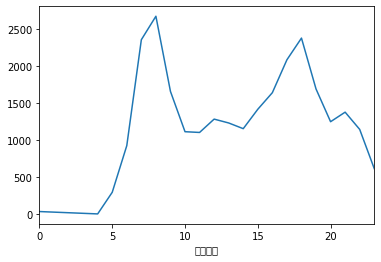

In [129]:
sampleUsage[2].plot()

In [130]:
sampleBus

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,승차일
118183,900023247632,500.0,41002046.0,141771409.0,2018-07-01 05:02:08,2.018070e+13,4170502.0,4116836.0,환승,1
48601,900126022166,500.0,41002046.0,141771595.0,2018-07-01 05:03:33,2.018070e+13,4179141.0,1855.0,환승,1
27252,900081039282,500.0,41002046.0,141771595.0,2018-07-01 05:04:23,2.018070e+13,4110308.0,4135023.0,단일,1
84413,900025130347,500.0,41002046.0,141771595.0,2018-07-01 05:04:24,2.018070e+13,4110308.0,4100577.0,단일,1
54073,900459410633,500.0,41002046.0,141771409.0,2018-07-01 05:06:24,2.018070e+13,4116671.0,4108128.0,단일,1
...,...,...,...,...,...,...,...,...,...,...
951150,900514258663,500.0,41002046.0,141771778.0,2018-07-05 00:26:29,2.018071e+13,4116898.0,4108069.0,환승,5
1033149,900490552736,500.0,41002046.0,141771507.0,2018-07-05 00:27:17,2.018071e+13,4110270.0,4100553.0,환승,5
976279,900079332102,500.0,41002046.0,141771637.0,2018-07-05 00:28:58,2.018071e+13,4112034.0,4108065.0,환승,5
993710,900505429971,500.0,41002046.0,141771110.0,2018-07-05 00:32:18,2.018071e+13,4117231.0,4116667.0,환승,5


In [133]:
eachCar = sampleBus[sampleBus['차량ID']==141771103]

In [136]:
thirdDayOfCar = eachCar[eachCar.승차일시.dt.day == 3]

In [1]:
thirdDayOfCar['하차일시'] = pd.to_datetime(thirdDayOfCar['하차일시'], format="%Y%m%d%H%M%S")

NameError: name 'pd' is not defined

In [138]:
thirdDayOfCar

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,승차일
579466,900491786971,500.0,41002046.0,141771103.0,2018-07-03 06:19:06,2018-07-03 06:30:56,4179150.0,4135025.0,단일,3
714254,900025719368,500.0,41002046.0,141771103.0,2018-07-03 06:21:25,2018-07-03 06:27:35,4179141.0,4110130.0,단일,3
844790,900136594254,500.0,41002046.0,141771103.0,2018-07-03 06:22:58,2018-07-03 06:31:26,4110308.0,4135025.0,단일,3
680915,900463127009,500.0,41002046.0,141771103.0,2018-07-03 06:23:01,2018-07-03 06:27:47,4110308.0,4110130.0,환승,3
624874,900451640554,500.0,41002046.0,141771103.0,2018-07-03 06:23:21,2018-07-03 06:41:44,4179200.0,4110254.0,단일,3
...,...,...,...,...,...,...,...,...,...,...
573474,100061663864,500.0,41002046.0,141771103.0,2018-07-03 23:27:02,2018-07-03 23:32:11,4135024.0,4197540.0,환승,3
575010,900391056795,500.0,41002046.0,141771103.0,2018-07-03 23:27:04,2018-07-03 23:33:07,4135024.0,4110131.0,환승,3
931678,900504057366,500.0,41002046.0,141771103.0,2018-07-03 23:33:11,2018-07-03 23:36:58,4110131.0,4100625.0,환승,3
770942,900153419005,500.0,41002046.0,141771103.0,2018-07-03 23:33:13,2018-07-03 23:41:13,4110131.0,4179150.0,단일,3


In [154]:
inAndOut = pd.DataFrame(thirdDayOfCar[['승차일시', '하차일시']].unstack())

In [153]:
inOut = [1 for _ in range(743)] + [-1 for _ in range(743)]

In [155]:
inAndOut['승하차'] = inOut

In [163]:
inAndOut.index = inAndOut.index.get_level_values(1)

In [165]:
inAndOut.columns = ['시각', '승하차']

In [166]:
inAndOut.sort_values('시각', inplace=True)

In [167]:
inAndOut

,시각,승하차
579466,2018-07-03 06:19:06,1
714254,2018-07-03 06:21:25,1
844790,2018-07-03 06:22:58,1
680915,2018-07-03 06:23:01,1
624874,2018-07-03 06:23:21,1
...,...,...
849417,2018-07-03 23:37:08,-1
594080,2018-07-03 23:37:17,-1
770942,2018-07-03 23:41:13,-1
867185,2018-07-03 23:41:37,-1


In [168]:
inAndOut.to_excel("차량승하차샘플.xlsx")

In [175]:
def round_down(n):
    return (n//10)*10

In [176]:
round_down(44)

40

In [174]:
math.floor(124, -1)

TypeError: floor() takes exactly one argument (2 given)

In [205]:
gg = inAndOut.groupby([inAndOut['시각'].dt.hour, inAndOut['시각'].dt.minute.apply(round_down)])

In [208]:
gg.sum().to_csv("sam.xlsx")

In [209]:
gg.count().to_excel('sam2.xlsx')

In [213]:
gg.size().to_excel("sam2.xlsx")

In [215]:
gg.sum().to_excel('sam.xlsx')

In [217]:
thirdDay = sampleBus[sampleBus['승차일시'].dt.day==3]

In [218]:
thirdDay

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,승차일
329462,900390032068,500.0,41002046.0,141771752.0,2018-07-03 00:00:44,2.018070e+13,4170093.0,4117039.0,환승,3
410839,900095179115,500.0,41002046.0,141771110.0,2018-07-03 00:00:44,2.018070e+13,4117231.0,4115416.0,환승,3
381687,900352832420,500.0,41002046.0,141771110.0,2018-07-03 00:00:46,2.018070e+13,4117231.0,4116667.0,환승,3
209423,900178111065,500.0,41002046.0,141771752.0,2018-07-03 00:00:50,2.018070e+13,4170093.0,4117061.0,환승,3
228032,900497262278,500.0,41002046.0,141771752.0,2018-07-03 00:00:52,2.018070e+13,4170093.0,4117071.0,환승,3
...,...,...,...,...,...,...,...,...,...,...
552240,900501799886,500.0,41002046.0,141773328.0,2018-07-03 23:59:16,2.018070e+13,4111747.0,4111839.0,단일,3
608605,900473011513,500.0,41002046.0,141771762.0,2018-07-03 23:59:29,2.018070e+13,4135019.0,4100625.0,단일,3
814681,900491574840,500.0,41002046.0,141771466.0,2018-07-03 23:59:37,2.018070e+13,4179223.0,4150153.0,단일,3
611225,900480951310,500.0,41002046.0,141771466.0,2018-07-03 23:59:40,2.018070e+13,4179223.0,4111750.0,환승,3


In [222]:
thirdDayOfCar.groupby('승차역ID').size().sort_values()

승차역ID
4116682.0     1
4117201.0     1
4117188.0     1
4117064.0     1
4117061.0     1
             ..
4116900.0    17
4116760.0    24
4117072.0    26
4110270.0    27
4170093.0    43
Length: 150, dtype: int64

In [225]:
stops = pd.read_table("PJT001_stations_table.txt", sep=',')

In [227]:
stops.to_excel("PJT001_stations_table.xlsx")

In [228]:
moves = pd.read_csv("PJT001_sk_emd_od.csv")

In [230]:
moves.to_excel("PJT001_sk_emd_od.xlsx")

In [231]:
routes = pd.read_csv("PJT001_routestationinfo.csv")

In [233]:
routes.to_excel("PJT001_routestationinfo.xlsx")